# Capture Traces for 27.12

In [1]:
%run "./Capture_traces_General.ipynb"

C:\Users\Samuel\AppData\Local\Temp\ipykernel_17624\4114886631.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


✔️ The File uploader succesfuly imported.
✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.
✔️ The Analyser succesfuly runned.
✔️ The General functions/agregate succesfuly imported.


## Target [UNSIGNED CHAR NO_OPT RAND] Measurement: 

  1. Measure target device in action
  2. Show dynamic SPA
  3. Calculate correlation matrixes (for 4 methods, that is HW8, HW32,  Abs8, Abs32) 

In [2]:
#firmwareName = 'basic_quantized3_MLP-Rand'
firmwareName = 'basic_quantized2_MLP-NO_OPT-Rand'
epochs_list = [1000]
decimate = 1
reverse = False

In [3]:
scope, target, cw_setuper = setup(f"makefile_dir_{firmwareName}")
time.sleep(10)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_quantized2_MLP-NO_OPT-Rand/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 22699 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 22699 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1000 [00:00<?, ?it/s]

(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0b
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0a
(ChipWhisperer Target WARNING|File SimpleSerial2.py:514) Unexpected start to command 101
(ChipWhisperer Target WARNING|File SimpleSerial2.py:502) Read timed out: 


Target timed out!
✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 2d 46 04 78 68 ff 2b 00 cf 29 b4 d8 a7 3f f1 00 2d fb a4 52 65 00 aa 00')


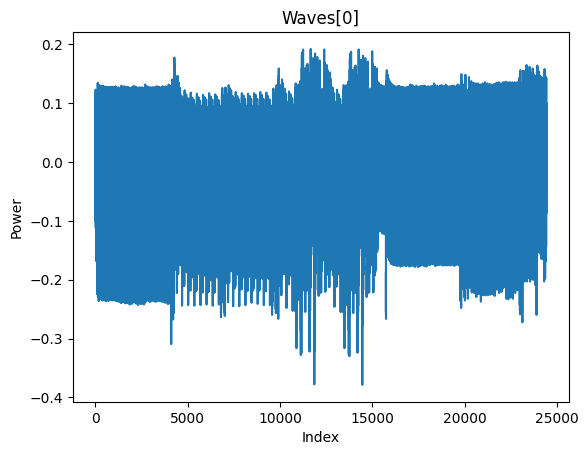

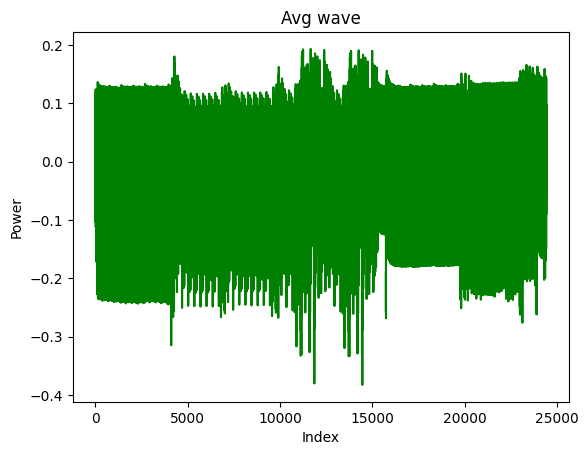

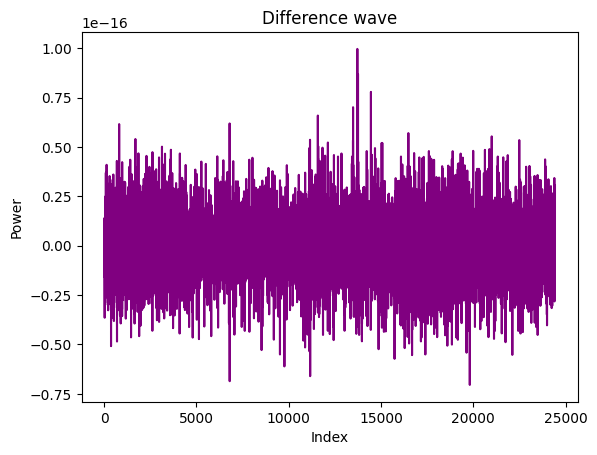

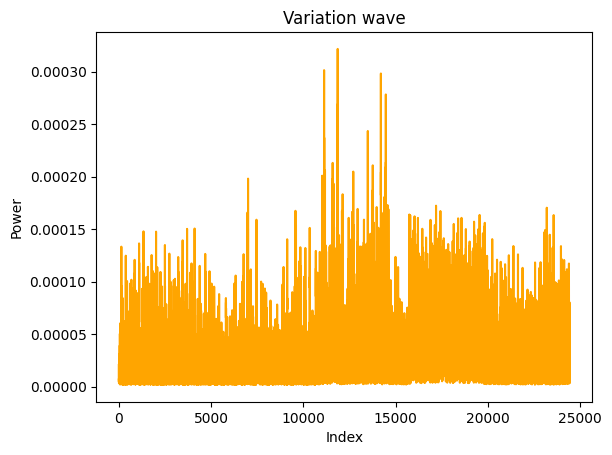

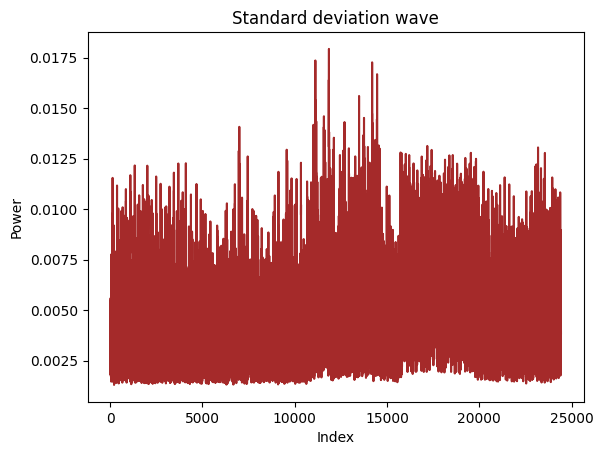

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

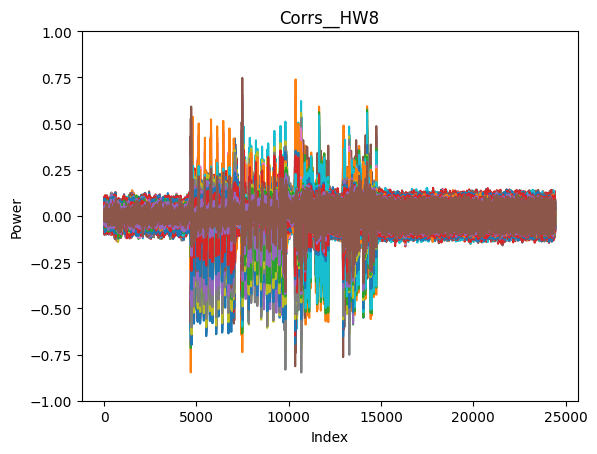

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

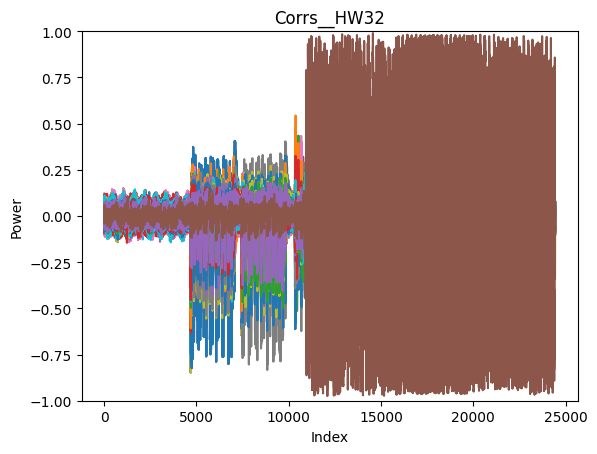

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

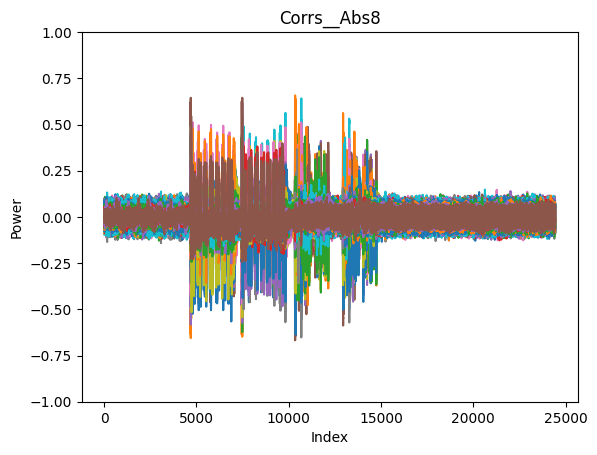

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

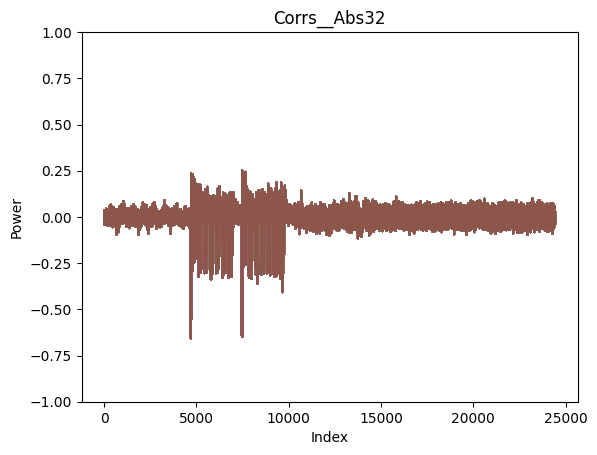

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [4]:
corr_HW8, corr_HW32, corr_Abs8, corr_Abs32, rand_inputs, waves, out, diff_avg, avg_wave, var = capture_correlate(scope=scope,
                                                                                                                      epochs_list = epochs_list,
                                                                                                                      decimate = decimate,
                                                                                                                      reverse = reverse,
                                                                                                                      runName=firmwareName)

### SPA

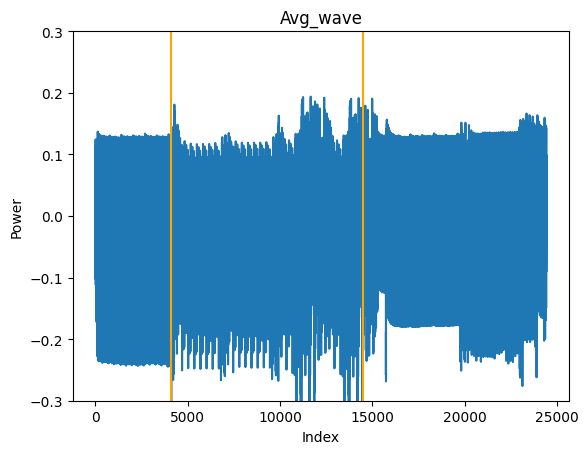

In [5]:
activity_borders = [4100, 14500]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = f"avg_wave_{firmwareName}", mult=False, ylim=[-0.3,0.3], graph_title="Avg_wave", ylabel="Power", borders = activity_borders)

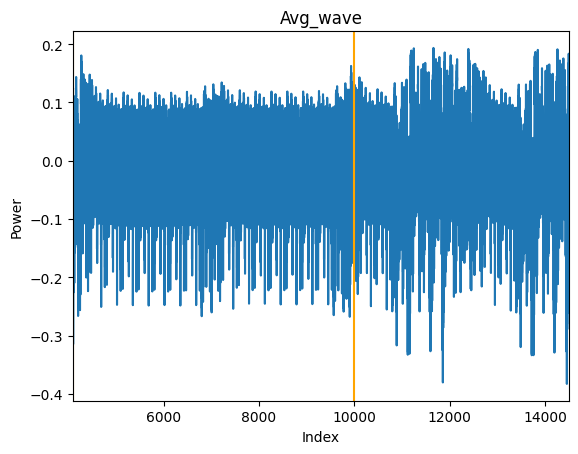

In [6]:
#prev_borders = next_borders
layer_borders = [4100, 10000]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = "ANN_Active", mult=False, xlim=[activity_borders[0],activity_borders[1]], graph_title="Avg_wave",
                  ylabel="Power", borders = layer_borders)

#### SPA of neuron's 1. layer

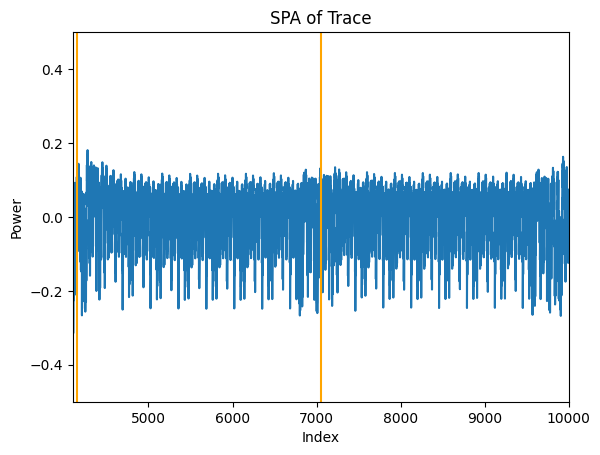

In [7]:
#prev_borders = next_borders
neuron_borders = [4150, 7050]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1", mult=False, xlim=[layer_borders[0],layer_borders[1]], ylim=[-0.5,0.5], graph_title="SPA of Trace",
          ylabel="Power", borders = neuron_borders)
offset = neuron_borders[1] - neuron_borders[0]

##### SPA of neuron's 1. layer, 1. neuron

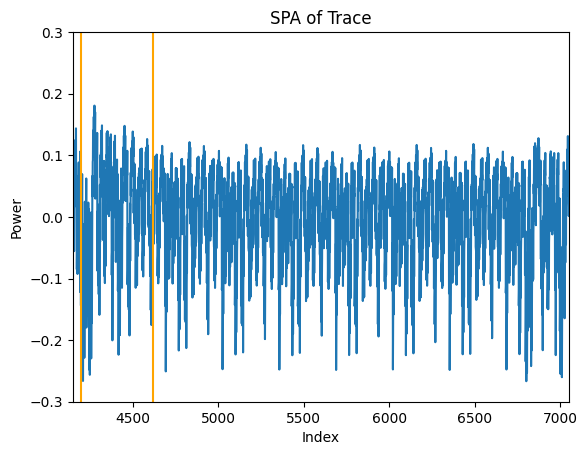

In [8]:
#prev_borders = next_borders
mult_borders = [4200, 4620]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1_Neuron_1th", mult=False, xlim=[neuron_borders[0],neuron_borders[1]], ylim=[-0.3,0.3], graph_title="SPA of Trace",
          ylabel="Power", borders = mult_borders)

###### SPA of neuron's 1. layer, 1. neuron, 1. multiplication

[ 45  70   4 120 104 255  43   0 207  41 180 216 167  63 241   0  45 251
 164  82]


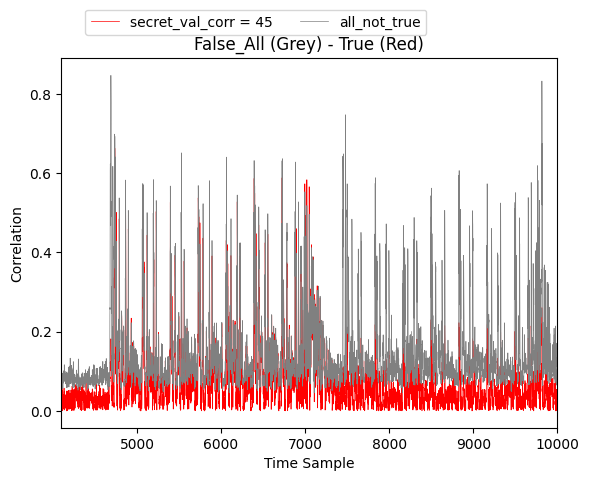

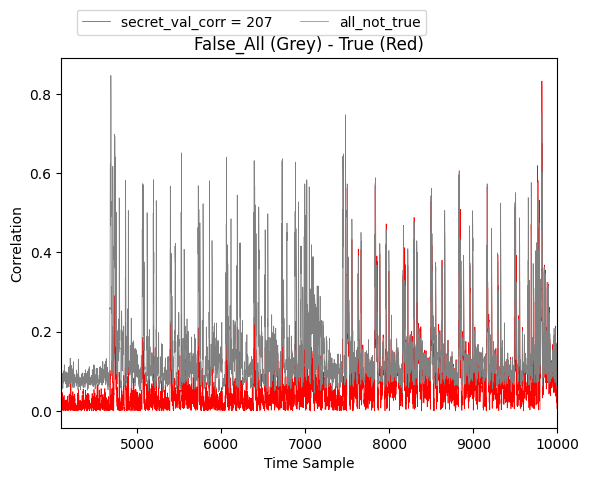

In [9]:
#prev_borders = next_borders
secrets = np.array(out)[3:-4]
print(secrets)
corr_map = abs(np.array(corr_HW8))
compTrueToAll_corrMatrix(corr_map, true_secret = 45, xlim=[4100, 10000], true_last = False, saveName = f'CPA_mult_level_secret[{45}]')
compTrueToAll_corrMatrix(corr_map, true_secret = 207, xlim=[4100, 10000], true_last = False, saveName = f'CPA_mult_level_secret[{207}]')

### CPA

##### CPA, weight extraction - Abs8

Hello 45
Peak range: 0.3
24429
 Index of global max: 10345 and global_max_val: 0.6678618038862166


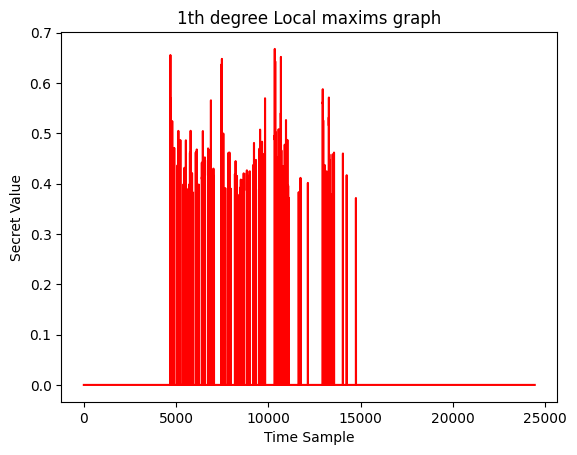

Number of uniques: 38
Number of local maxims: 306
Uniquess: [1, 2, 208, 180, 160, 45, 90, 104, 4, 240, 207, 224, 60, 13, 192, 76, 152, 128, 121, 242, 64, 144, 112, 135, 200, 14, 211, 37, 219, 182, 108, 148, 80, 49, 120, 188, 222, 111]
Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 208, 208, 180, 160, 180, 180, 45, 45, 90, 90, 90, 45, 208, 208, 160, 160, 180, 180, 180, 180, 180, 90, 90, 90, 160, 208, 208, 208, 160, 160, 160, 180, 90, 45, 45, 90, 160, 160, 160, 180, 160, 160, 160, 208, 45, 45, 90, 90, 90, 208, 160, 180, 180, 90, 90, 160, 160, 160, 160, 160, 160, 208, 180, 180, 180, 45, 90, 90, 90, 90, 160, 160, 160, 160, 208, 208, 180, 180, 90, 90, 90, 208, 160, 160, 104, 160, 208, 90, 45, 45, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 240, 240, 240, 240, 207, 207, 207, 224, 224, 224, 224, 224, 60, 207, 207, 207, 207, 207, 224, 13, 207, 207, 207, 207, 224, 224, 224, 224, 60, 207, 207, 207, 207, 224, 224, 192, 60, 224, 192, 60, 60, 207, 207, 207, 224, 224, 224, 224, 60, 207, 207, 207, 

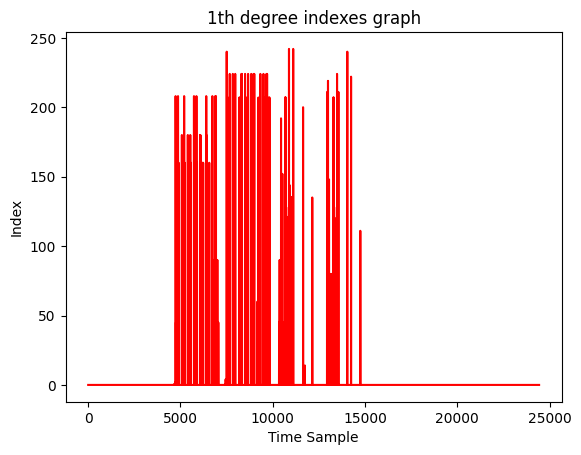

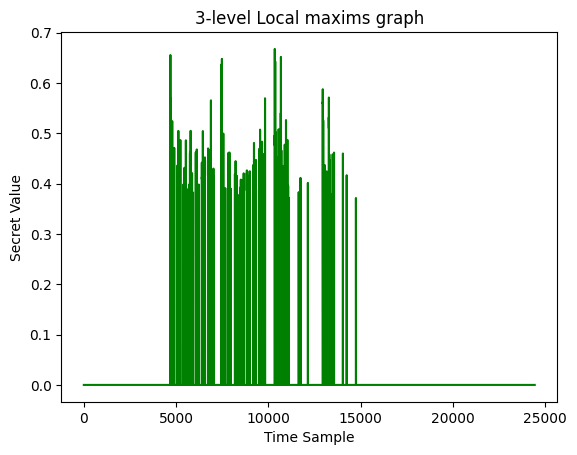

Number of uniques: 39
Number of local maxims: 384
Uniquess: [1, 2, 208, 180, 160, 45, 90, 104, 4, 240, 207, 224, 60, 13, 192, 76, 152, 128, 121, 242, 64, 144, 112, 135, 200, 14, 211, 37, 219, 182, 108, 74, 148, 80, 49, 120, 188, 222, 111]
Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 208, 208, 208, 208, 180, 160, 180, 180, 45, 45, 45, 90, 90, 90, 45, 208, 208, 160, 160, 160, 180, 180, 180, 180, 180, 180, 90, 90, 90, 160, 208, 208, 208, 160, 160, 160, 160, 180, 90, 45, 45, 90, 160, 160, 160, 180, 160, 160, 160, 208, 45, 45, 90, 90, 90, 90, 160, 160, 208, 160, 180, 180, 90, 90, 90, 90, 160, 160, 160, 160, 160, 160, 160, 208, 180, 180, 180, 45, 90, 90, 90, 90, 160, 160, 160, 160, 160, 208, 208, 180, 180, 180, 90, 90, 90, 90, 90, 90, 208, 160, 160, 160, 104, 160, 208, 90, 45, 45, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 240, 240, 240, 240, 240, 240, 240, 240, 207, 207, 207, 224, 224, 224, 224, 224, 224, 60, 60, 207, 207, 207, 207, 207, 224, 13, 207, 207, 207, 

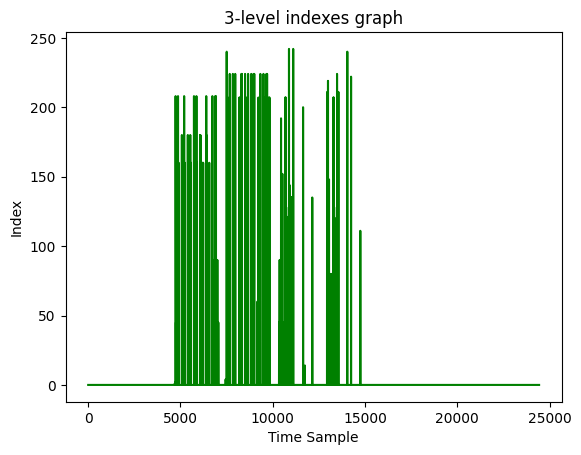

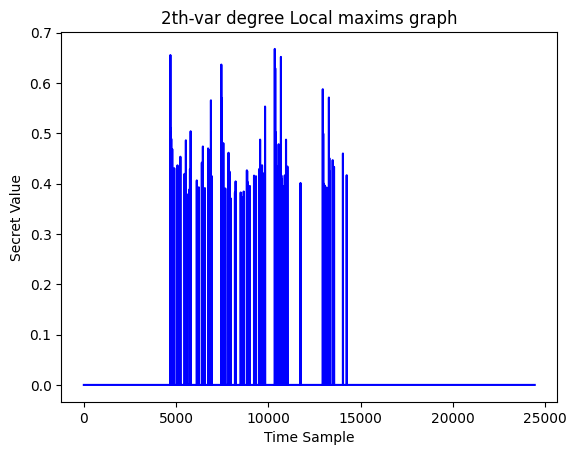

Number of uniques: 25
Number of local maxims: 81
Uniquess: [1, 2, 180, 45, 90, 208, 160, 240, 207, 224, 60, 13, 192, 76, 128, 121, 242, 64, 135, 14, 182, 37, 80, 211, 222]
Local maxims: [1, 2, 180, 45, 90, 208, 160, 180, 90, 208, 160, 90, 160, 160, 208, 45, 90, 90, 160, 160, 90, 160, 180, 90, 160, 208, 1, 1, 240, 207, 224, 60, 207, 13, 207, 207, 224, 207, 224, 192, 207, 207, 224, 207, 224, 224, 207, 207, 224, 224, 60, 207, 45, 45, 45, 192, 76, 45, 207, 207, 128, 121, 242, 64, 121, 45, 135, 135, 14, 45, 45, 182, 37, 80, 207, 207, 128, 128, 211, 240, 222]


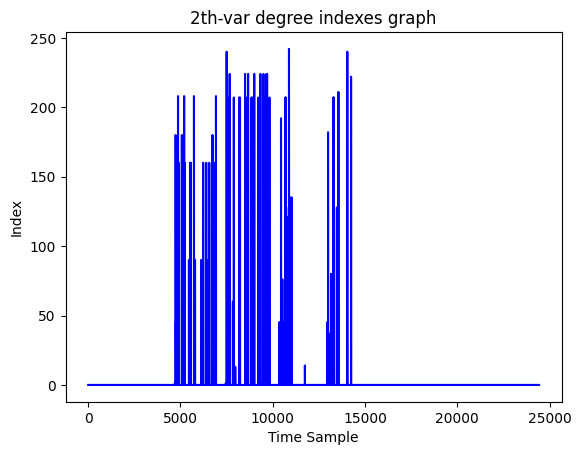

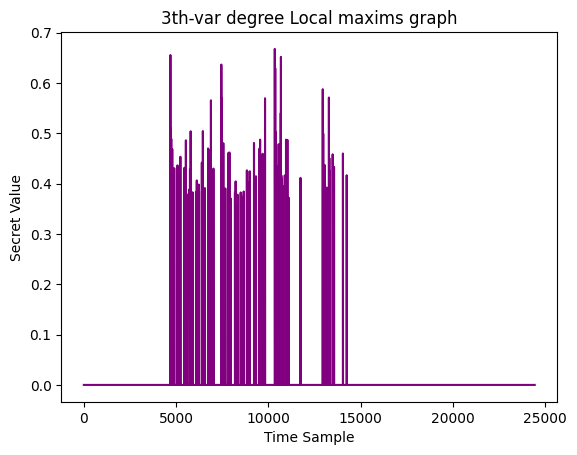

Number of uniques: 29
Number of local maxims: 188
Uniquess: [1, 2, 180, 160, 45, 90, 208, 240, 207, 224, 60, 13, 192, 76, 152, 128, 121, 242, 64, 135, 14, 211, 182, 108, 148, 37, 80, 49, 222]
Local maxims: [1, 1, 1, 1, 2, 2, 2, 180, 160, 180, 45, 90, 45, 208, 160, 180, 180, 180, 90, 90, 208, 208, 160, 160, 90, 45, 90, 160, 180, 160, 208, 45, 90, 90, 160, 180, 90, 160, 160, 160, 180, 180, 180, 90, 90, 90, 90, 160, 160, 208, 180, 90, 90, 160, 160, 160, 208, 45, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 240, 240, 240, 207, 207, 224, 224, 60, 207, 207, 207, 207, 13, 207, 207, 224, 224, 207, 207, 207, 224, 60, 192, 60, 207, 207, 224, 224, 224, 207, 207, 207, 224, 224, 207, 207, 207, 207, 207, 224, 224, 224, 60, 207, 207, 207, 207, 45, 45, 45, 45, 45, 45, 45, 90, 45, 192, 192, 76, 152, 45, 45, 207, 207, 207, 207, 207, 207, 128, 128, 121, 121, 242, 64, 121, 45, 45, 45, 135, 135, 135, 135, 135, 135, 242, 14, 14, 14, 211, 211, 45, 45, 45, 45, 45, 45, 45, 182, 108, 148, 37, 80, 49, 207, 207, 207, 207,

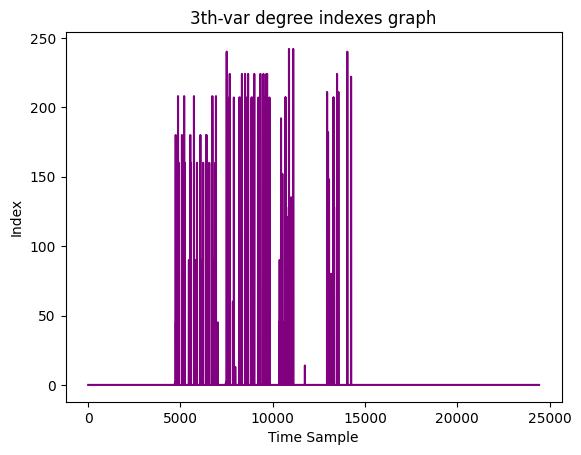

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4690, with correlation secret_corr = 0.656


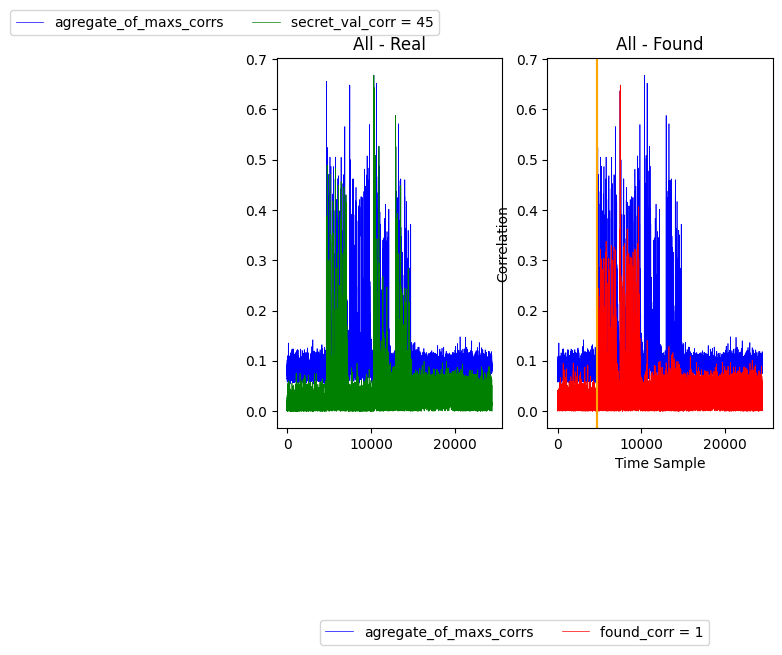

Hello 70
In range 4702 - 24429
 Found the soonest secret value is 2, at the time sample 4714, with correlation secret_corr = 0.510


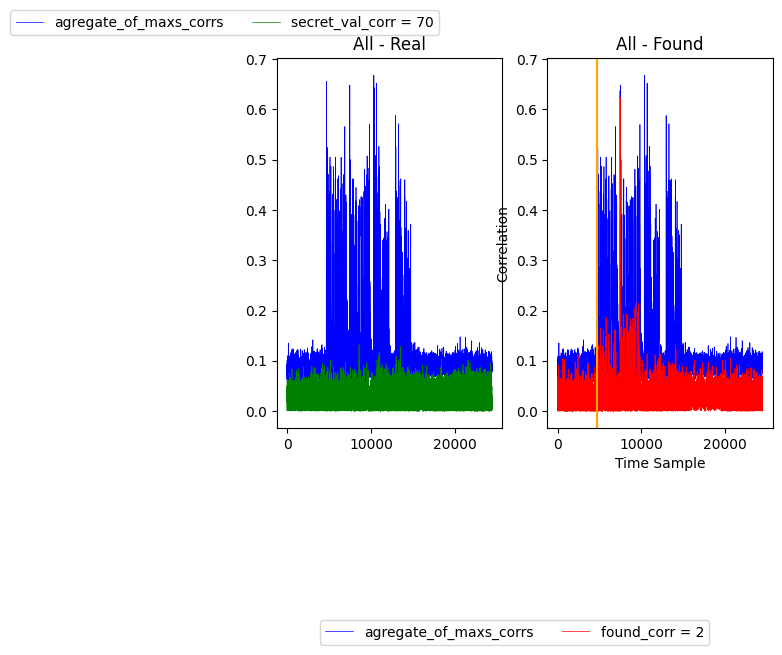

Hello 4
In range 4725 - 24429
 Found the soonest secret value is 180, at the time sample 4737, with correlation secret_corr = 0.489


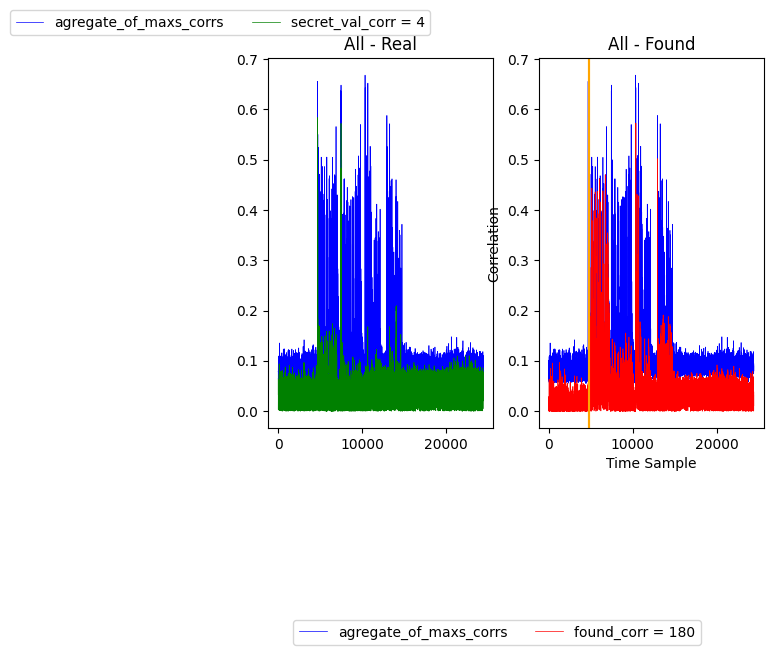

Hello 120
In range 4746 - 24429
 Found the soonest secret value is 45, at the time sample 4755, with correlation secret_corr = 0.373


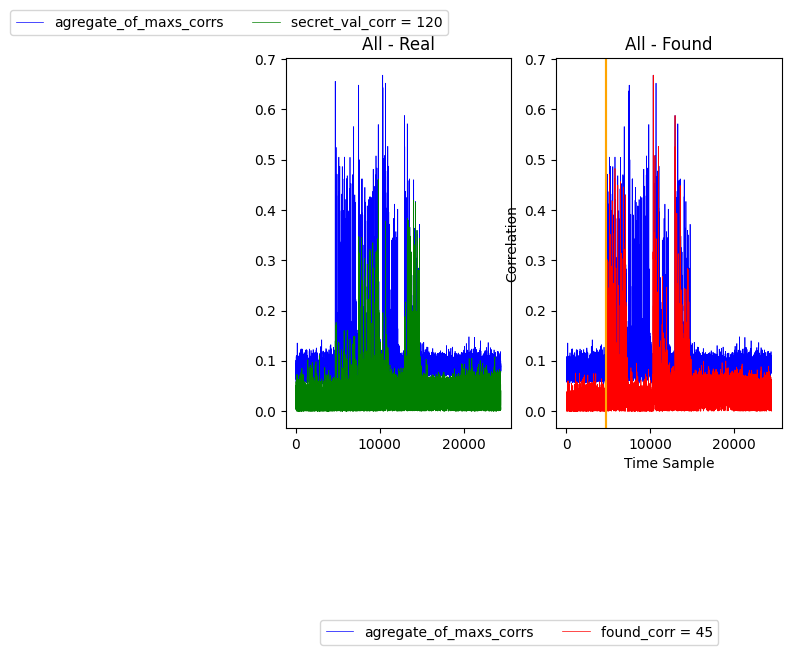

Hello 104
In range 4772 - 24429
 Found the soonest secret value is 90, at the time sample 4790, with correlation secret_corr = 0.469


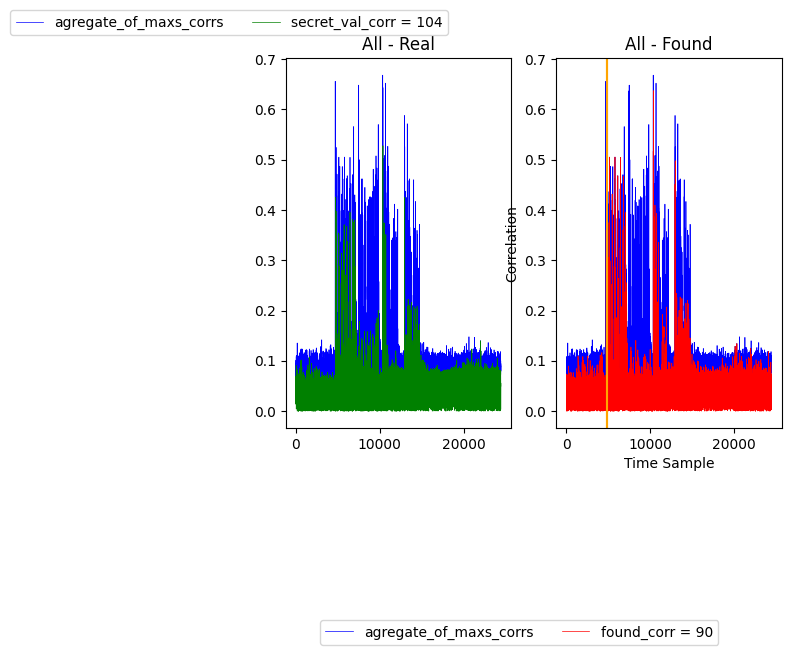

Hello 255
In range 4828 - 24429
 Found the soonest secret value is 208, at the time sample 4866, with correlation secret_corr = 0.398


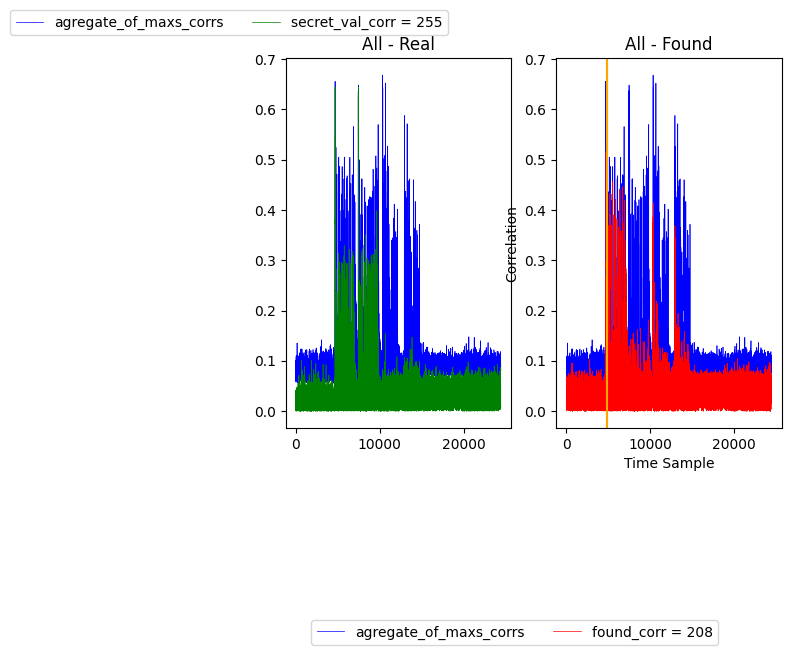

Hello 43
In range 4883 - 24429
 Found the soonest secret value is 160, at the time sample 4899, with correlation secret_corr = 0.431


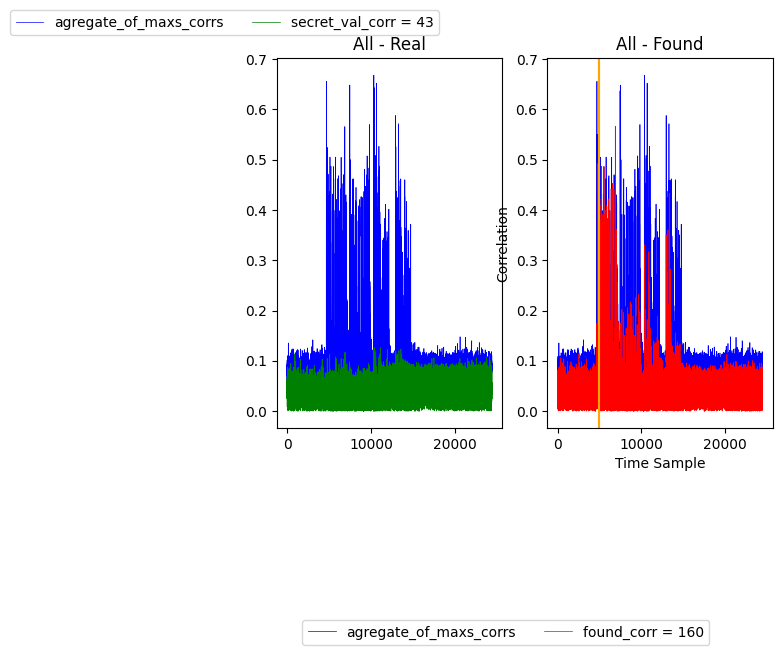

Hello 0
In range 4986 - 24429
 Found the soonest secret value is 180, at the time sample 5074, with correlation secret_corr = 0.436


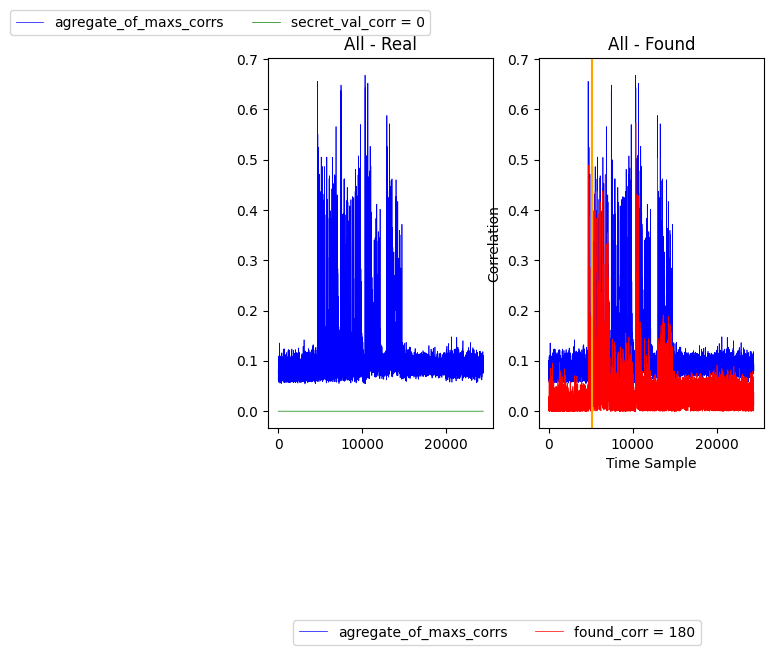

Hello 207
In range 5098 - 24429
 Found the soonest secret value is 90, at the time sample 5122, with correlation secret_corr = 0.416


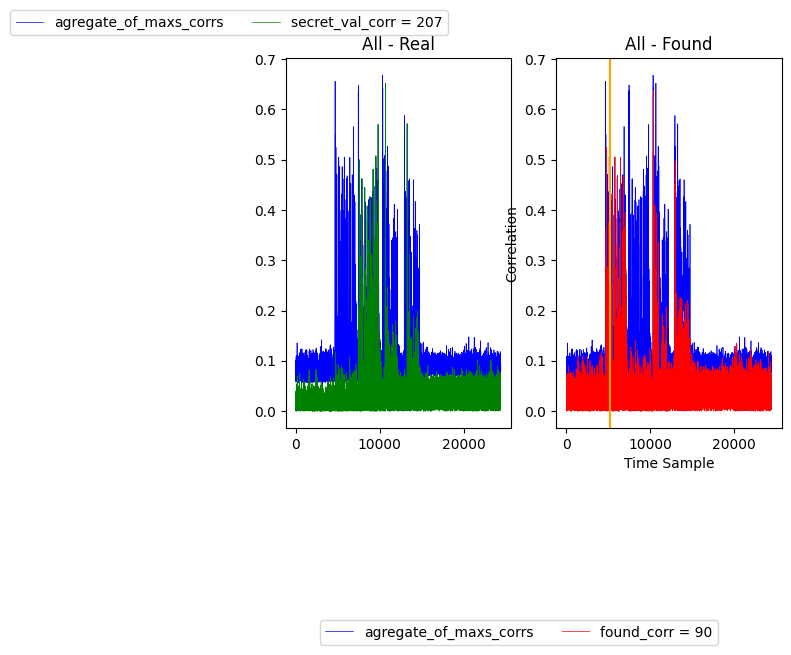

Hello 41
In range 5159 - 24429
 Found the soonest secret value is 208, at the time sample 5197, with correlation secret_corr = 0.433


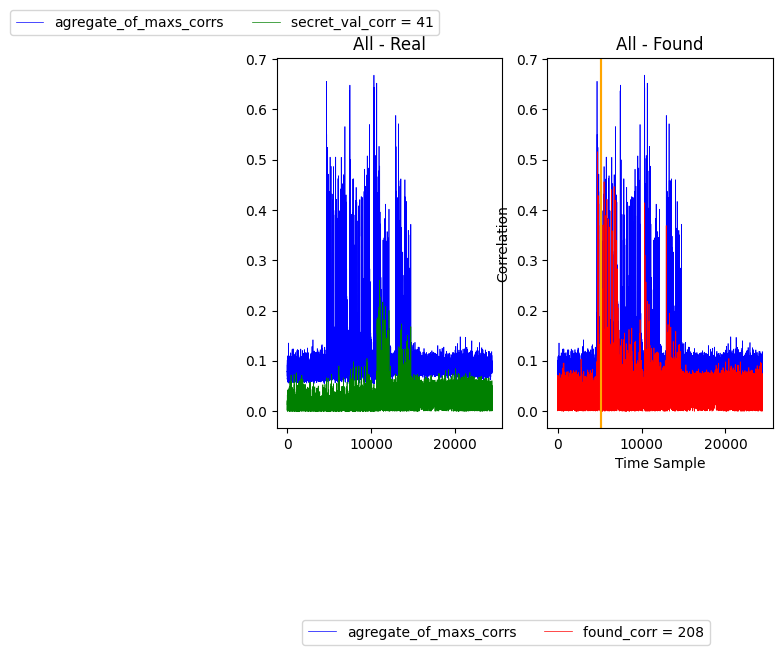

Hello 180
In range 5214 - 24429
 Found the soonest secret value is 160, at the time sample 5231, with correlation secret_corr = 0.454


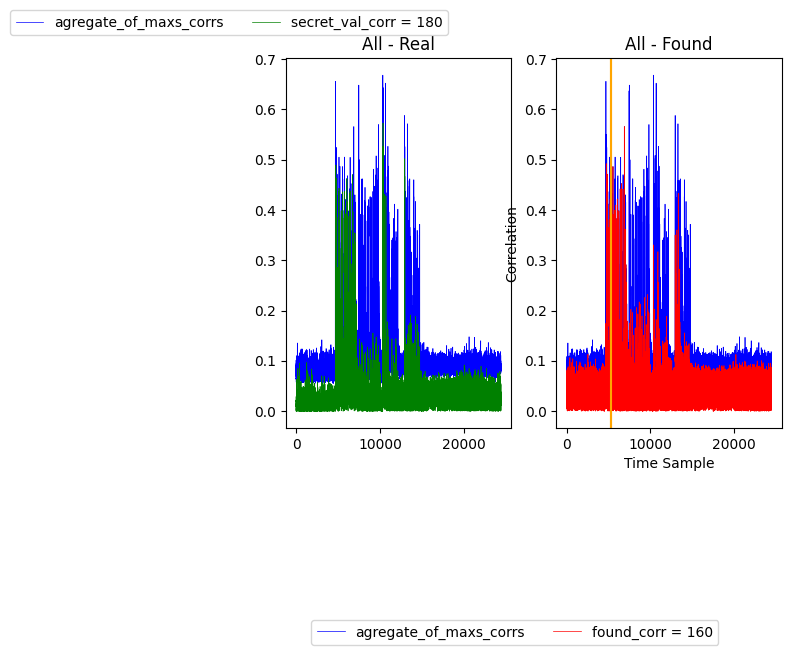

Hello 216
In range 5344 - 24429
 Found the soonest secret value is 90, at the time sample 5457, with correlation secret_corr = 0.420


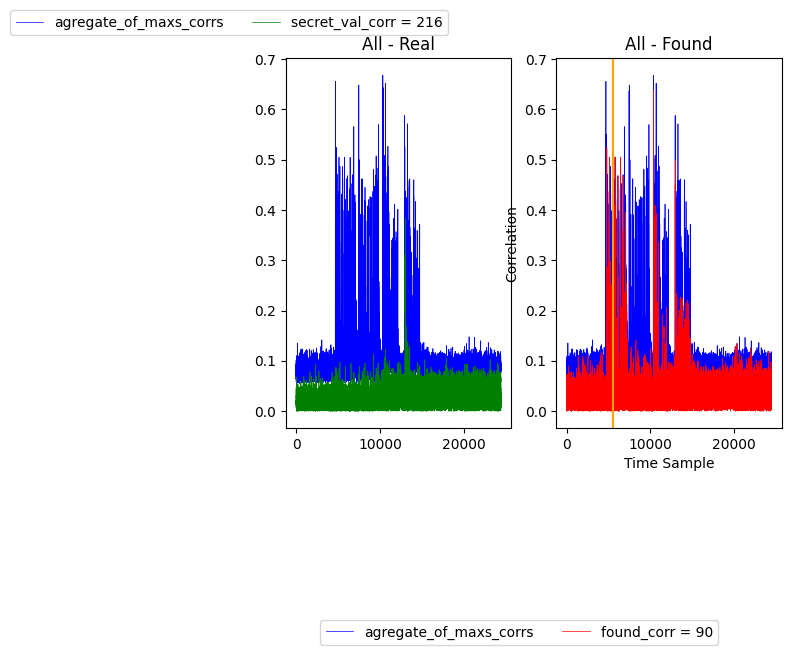

In [10]:
corr_map = abs(np.array(corr_Abs8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs8_{firmwareName}')

##### CPA, weight extraction - Abs32

Hello 45
Peak range: 0.3
24429
 Index of global max: 4690 and global_max_val: 0.655717881672022


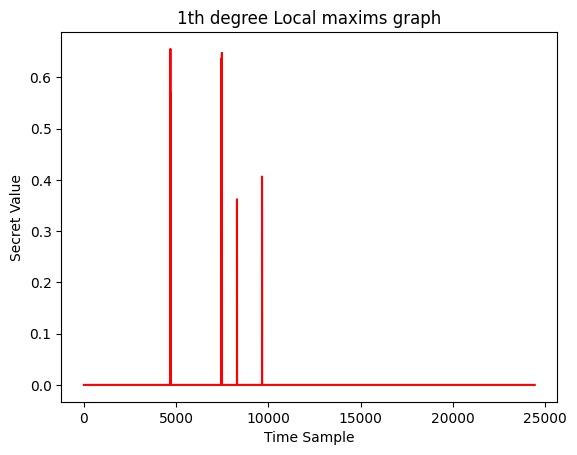

Number of uniques: 12
Number of local maxims: 29
Uniquess: [19, 45, 7, 31, 3, 69, 35, 117, 195, 23, 1, 87]
Local maxims: [19, 45, 7, 31, 3, 69, 45, 35, 19, 117, 195, 45, 23, 19, 31, 31, 1, 45, 23, 195, 31, 23, 45, 19, 87, 7, 45, 45, 1]


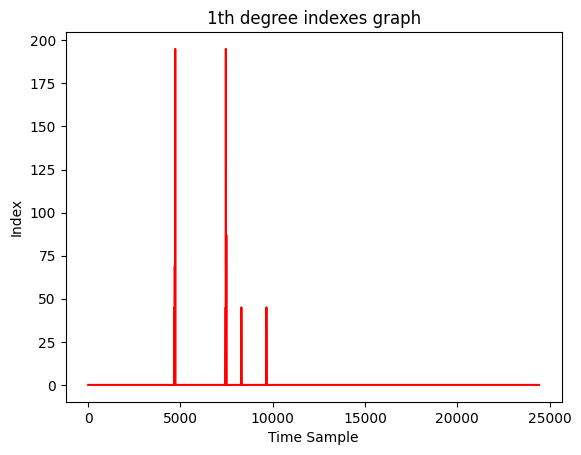

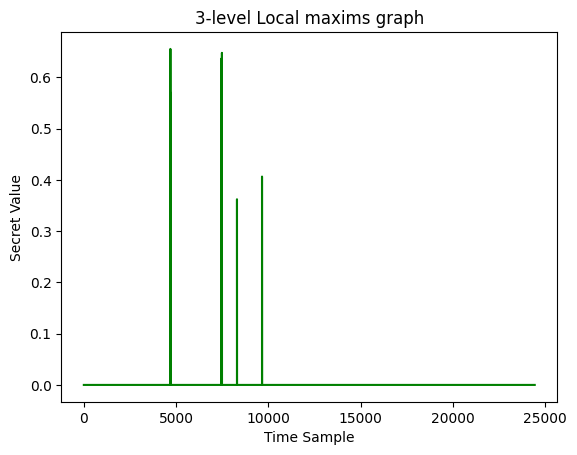

Number of uniques: 13
Number of local maxims: 37
Uniquess: [19, 45, 7, 31, 15, 3, 69, 23, 35, 117, 195, 1, 87]
Local maxims: [19, 19, 45, 45, 7, 45, 31, 15, 45, 3, 69, 45, 23, 35, 19, 117, 195, 45, 23, 19, 31, 31, 7, 1, 45, 23, 19, 195, 31, 23, 45, 19, 87, 7, 45, 45, 1]


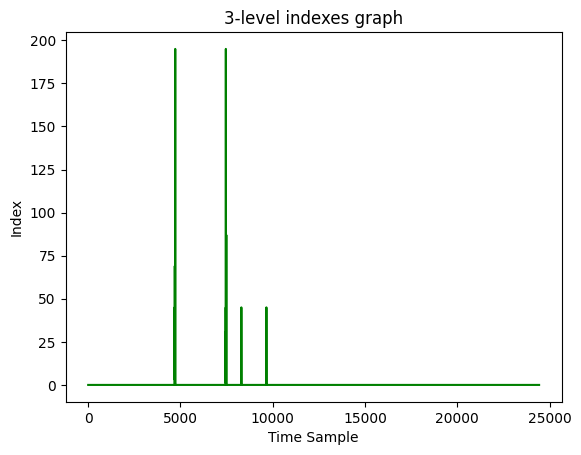

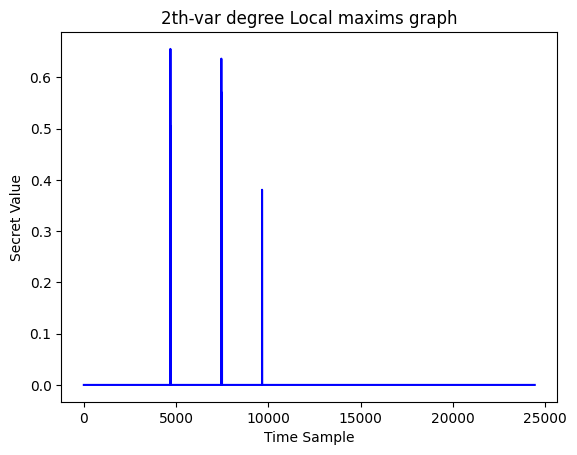

Number of uniques: 4
Number of local maxims: 5
Uniquess: [3, 117, 19, 1]
Local maxims: [3, 117, 19, 19, 1]


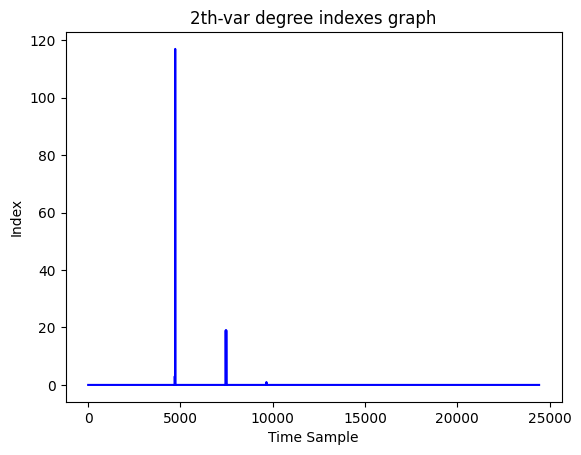

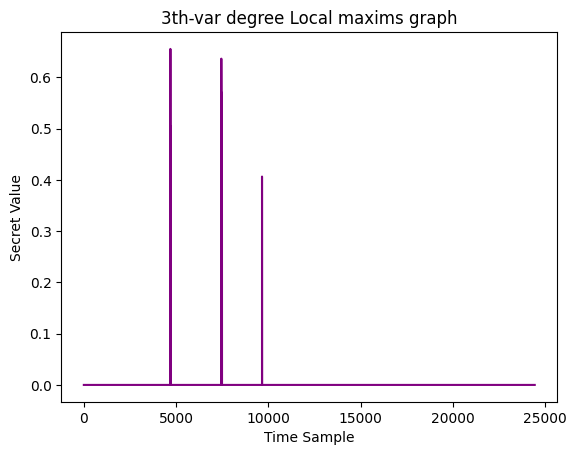

Number of uniques: 11
Number of local maxims: 21
Uniquess: [7, 3, 69, 45, 117, 195, 19, 31, 1, 23, 87]
Local maxims: [7, 3, 69, 45, 117, 195, 45, 19, 31, 31, 1, 45, 23, 195, 31, 23, 19, 87, 7, 45, 1]


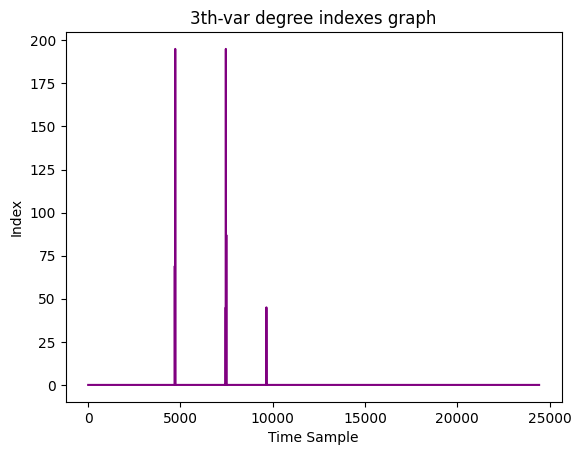

In range 0 - 24429
 Found the soonest secret value is 3, at the time sample 4690, with correlation secret_corr = 0.656


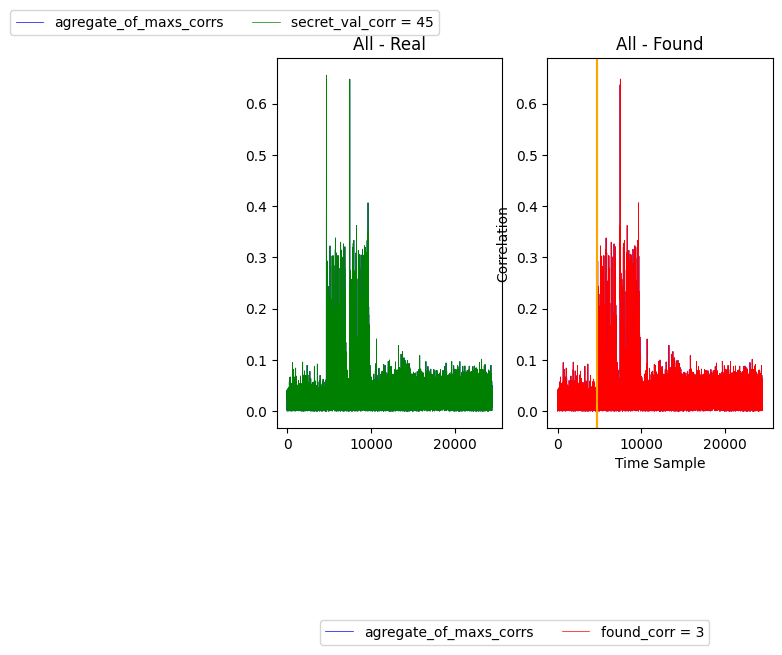

Hello 70
In range 4702 - 24429
 Found the soonest secret value is 117, at the time sample 4714, with correlation secret_corr = 0.504


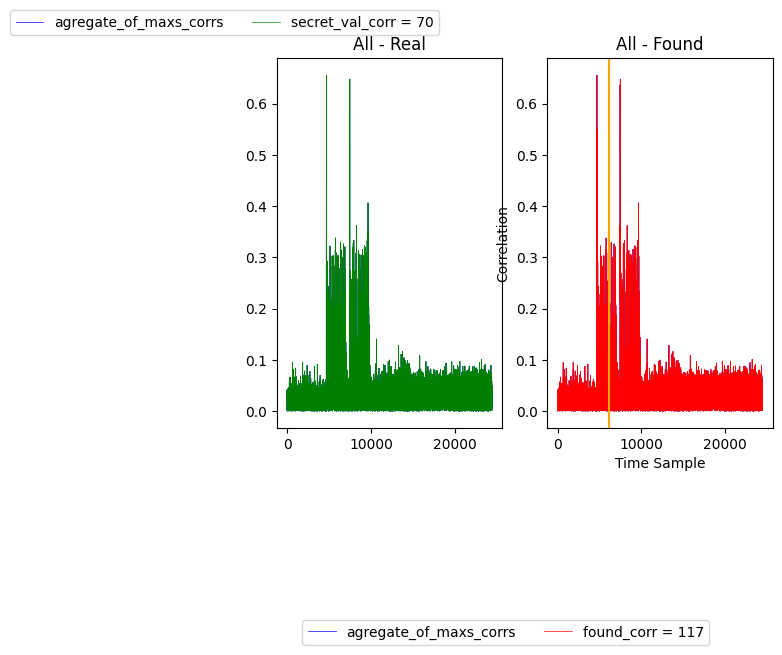

Hello 4
In range 6081 - 24429
 Found the soonest secret value is 19, at the time sample 7449, with correlation secret_corr = 0.637


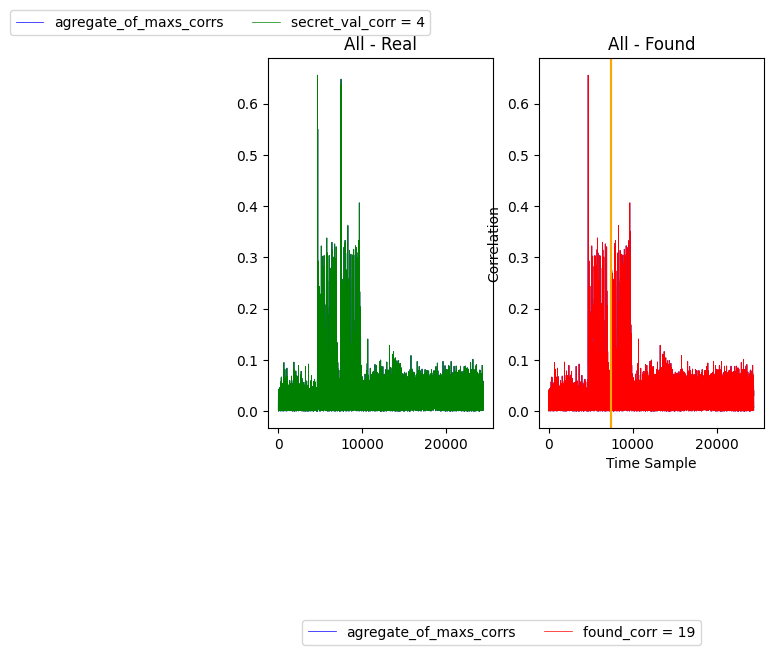

Hello 120
In range 7466 - 24429
 Found the soonest secret value is 19, at the time sample 7482, with correlation secret_corr = 0.570


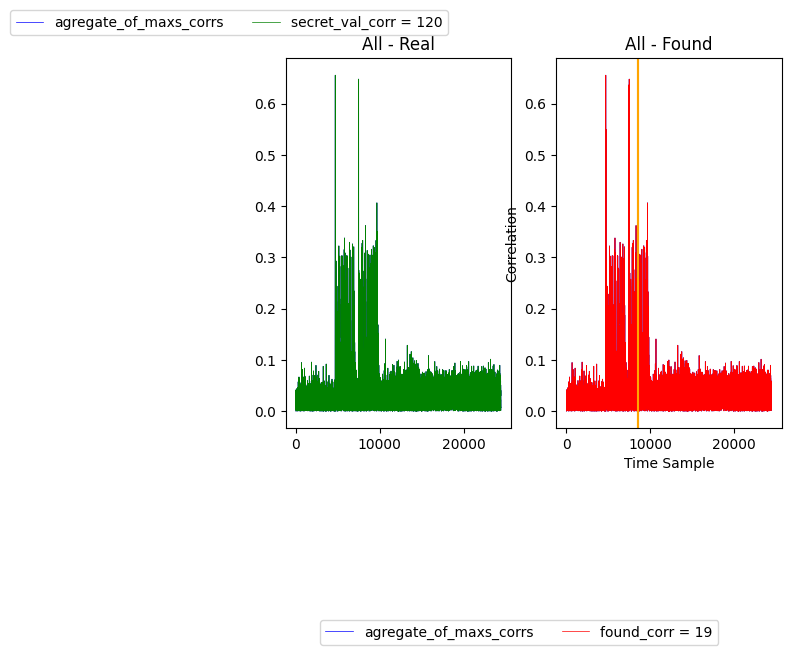

Hello 104
In range 8569 - 24429
 Found the soonest secret value is 1, at the time sample 9655, with correlation secret_corr = 0.381


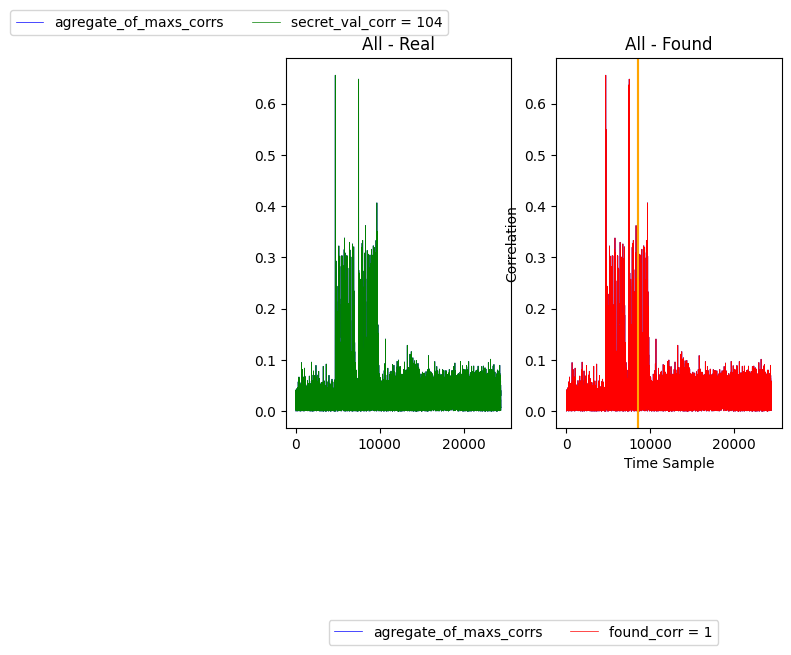

Hello 255
In range 8569 - 24429
 Found the soonest secret value is 1, at the time sample 9655, with correlation secret_corr = 0.381


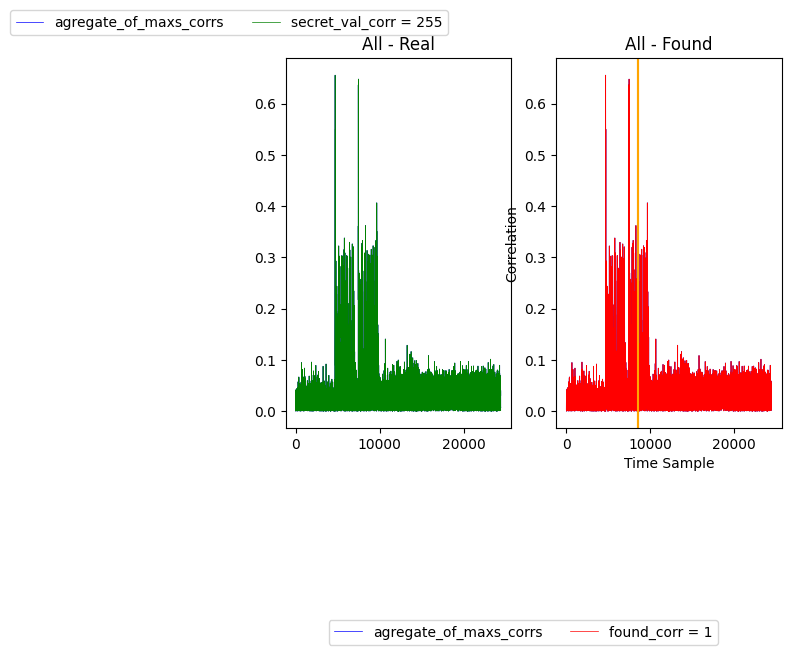

Hello 43
In range 8569 - 24429
 Found the soonest secret value is 1, at the time sample 9655, with correlation secret_corr = 0.381


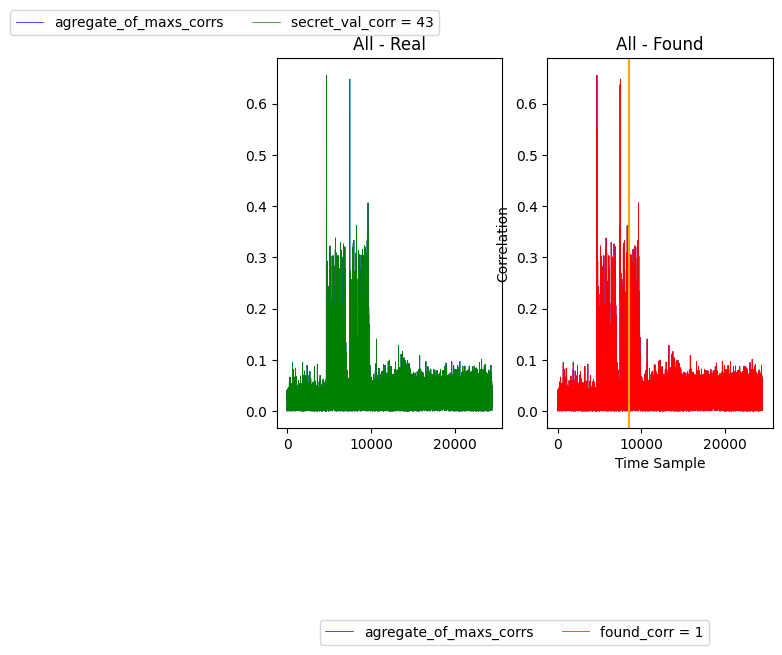

Hello 0
In range 8569 - 24429
 Found the soonest secret value is 1, at the time sample 9655, with correlation secret_corr = 0.381


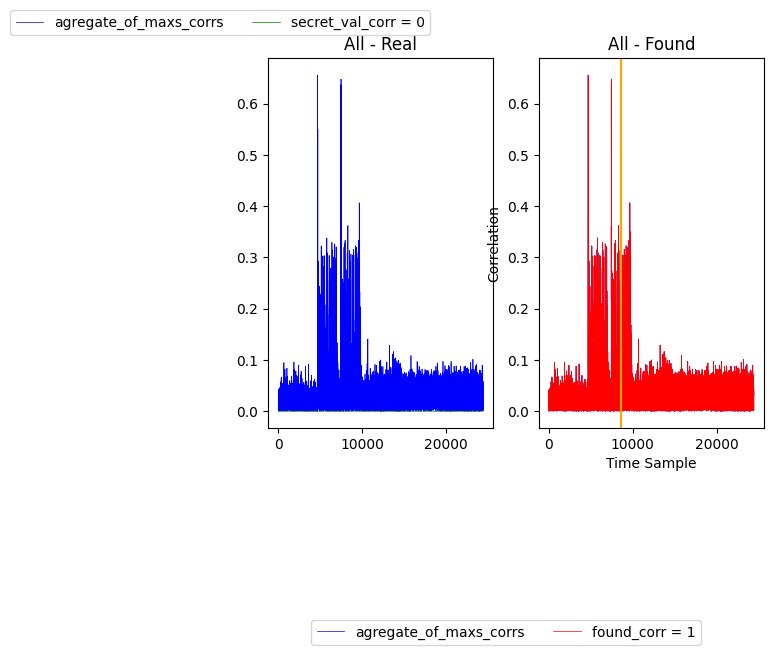

Hello 207
In range 8569 - 24429
 Found the soonest secret value is 1, at the time sample 9655, with correlation secret_corr = 0.381


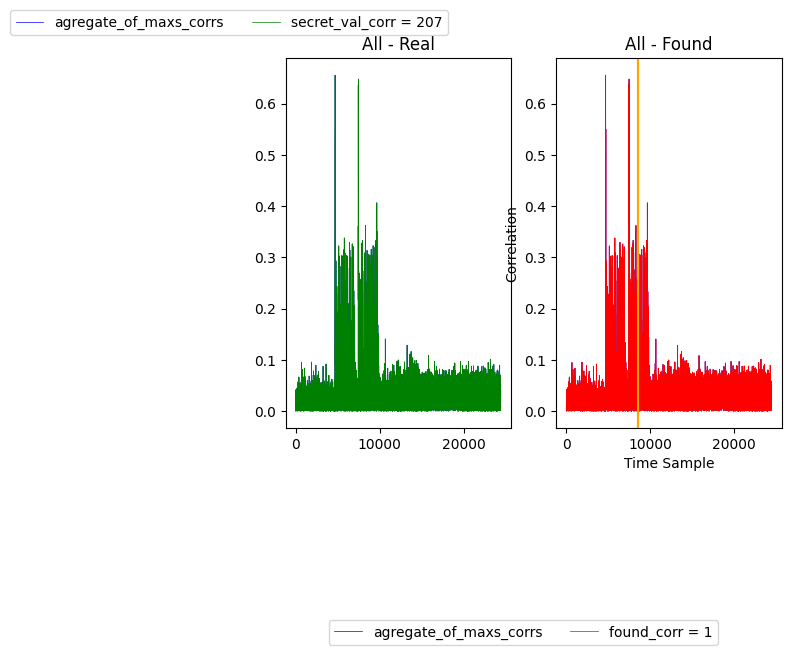

Hello 41
In range 8569 - 24429
 Found the soonest secret value is 1, at the time sample 9655, with correlation secret_corr = 0.381


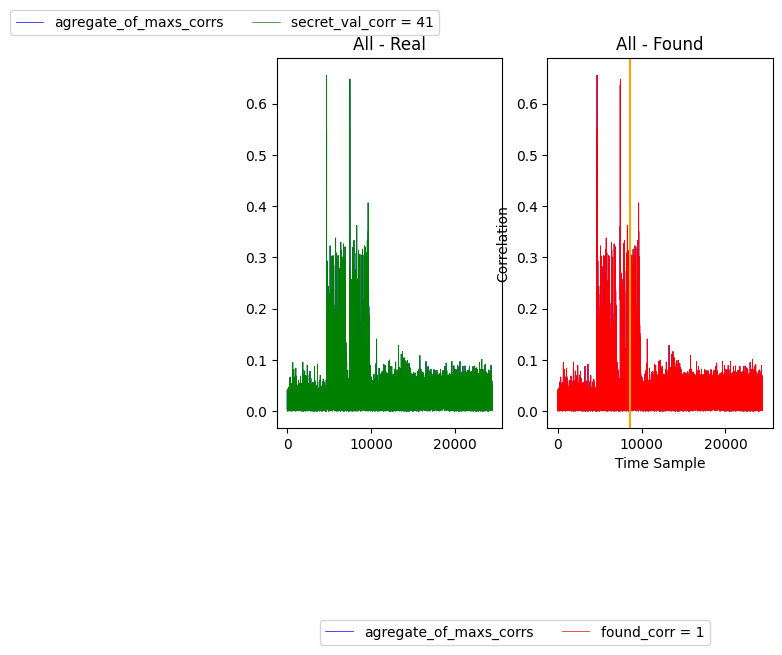

Hello 180
In range 8569 - 24429
 Found the soonest secret value is 1, at the time sample 9655, with correlation secret_corr = 0.381


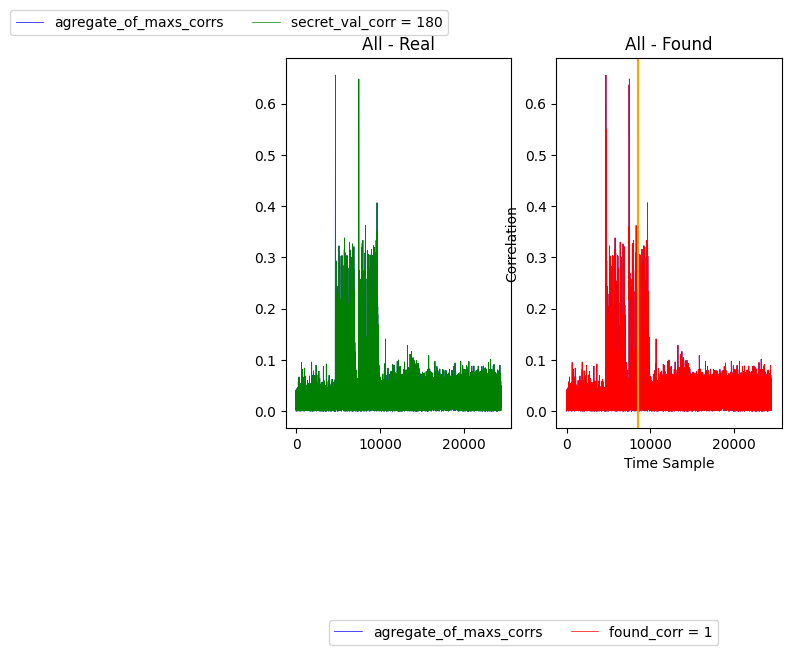

Hello 216
In range 8569 - 24429
 Found the soonest secret value is 1, at the time sample 9655, with correlation secret_corr = 0.381


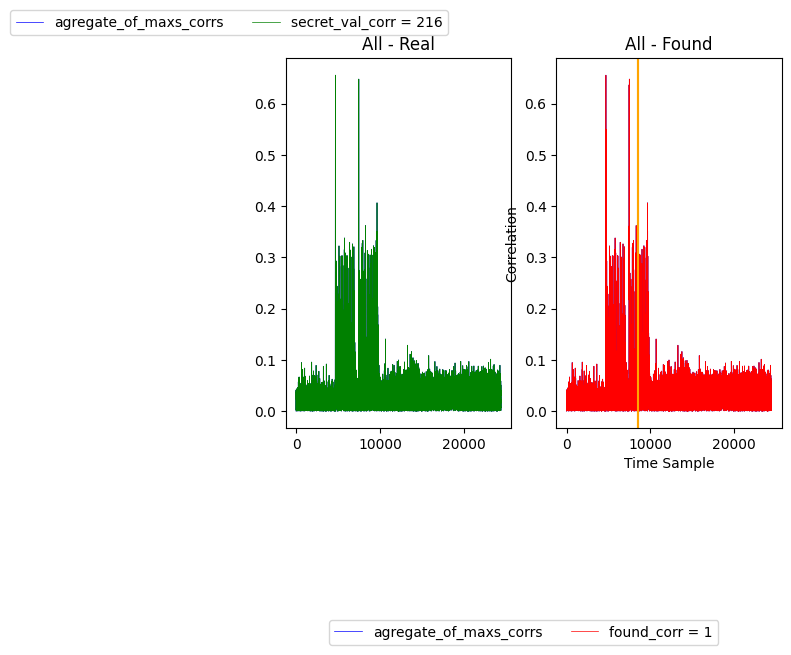

In [11]:
corr_map = abs(np.array(corr_Abs32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs32_{firmwareName}')

##### CPA, weight extraction - HW32

Hello 45
Peak range: 0.3
24429
 Index of global max: 14557 and global_max_val: 0.9894732646365006


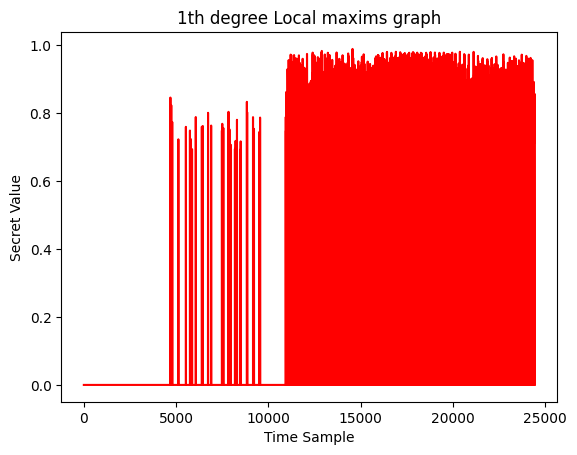

Number of uniques: 5
Number of local maxims: 3972
Uniquess: [1, 45, 129, 207, 255]
Local maxims: [1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 129, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

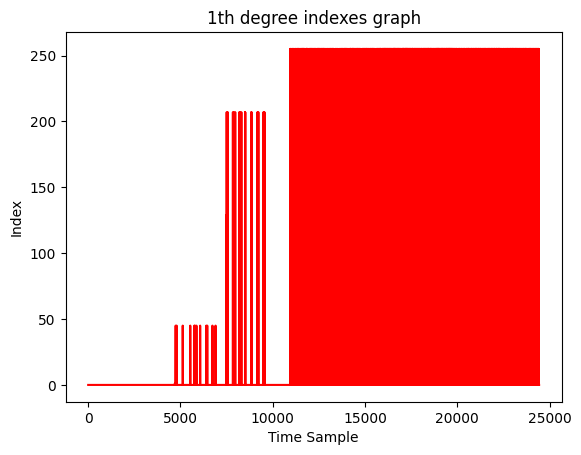

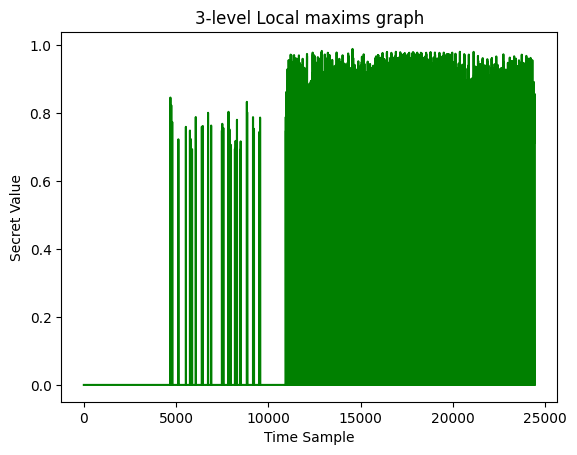

Number of uniques: 5
Number of local maxims: 5937
Uniquess: [1, 45, 129, 207, 255]
Local maxims: [1, 1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 129, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 2

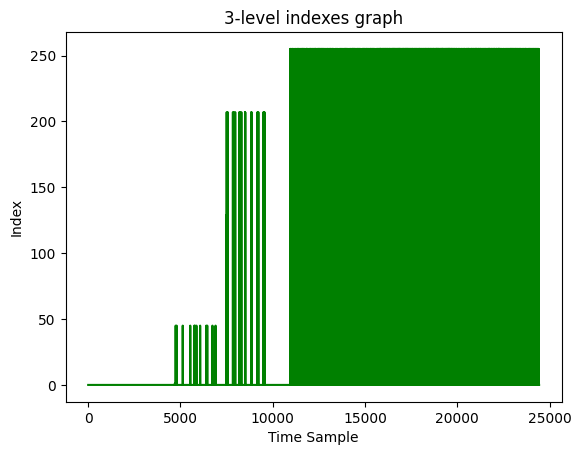

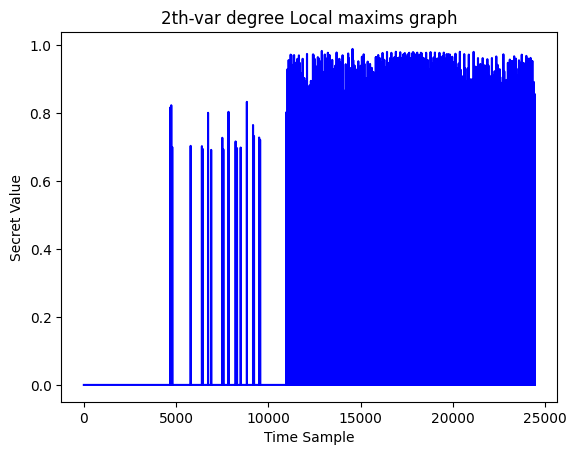

Number of uniques: 4
Number of local maxims: 489
Uniquess: [1, 45, 207, 255]
Local maxims: [1, 45, 45, 45, 45, 45, 45, 45, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

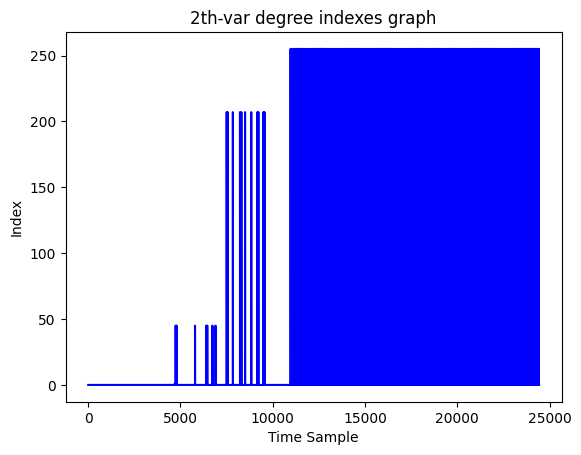

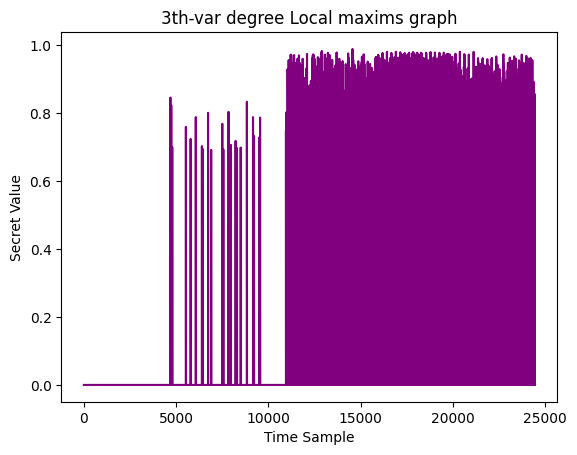

Number of uniques: 4
Number of local maxims: 2657
Uniquess: [1, 45, 207, 255]
Local maxims: [1, 1, 1, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 207, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 

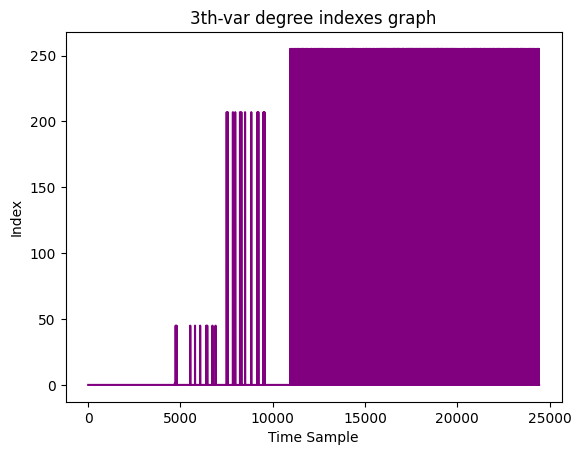

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4691, with correlation secret_corr = 0.817


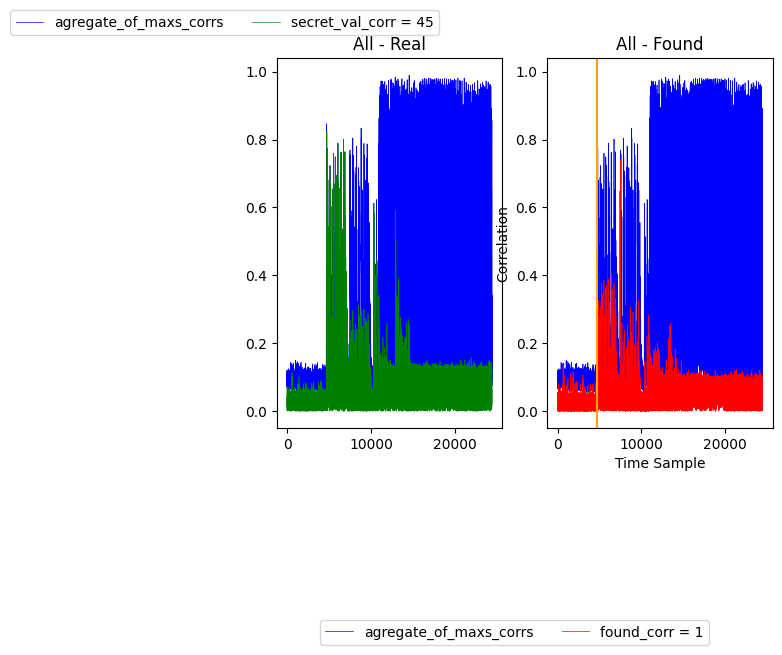

Hello 70
In range 4714 - 24429
 Found the soonest secret value is 45, at the time sample 4737, with correlation secret_corr = 0.824


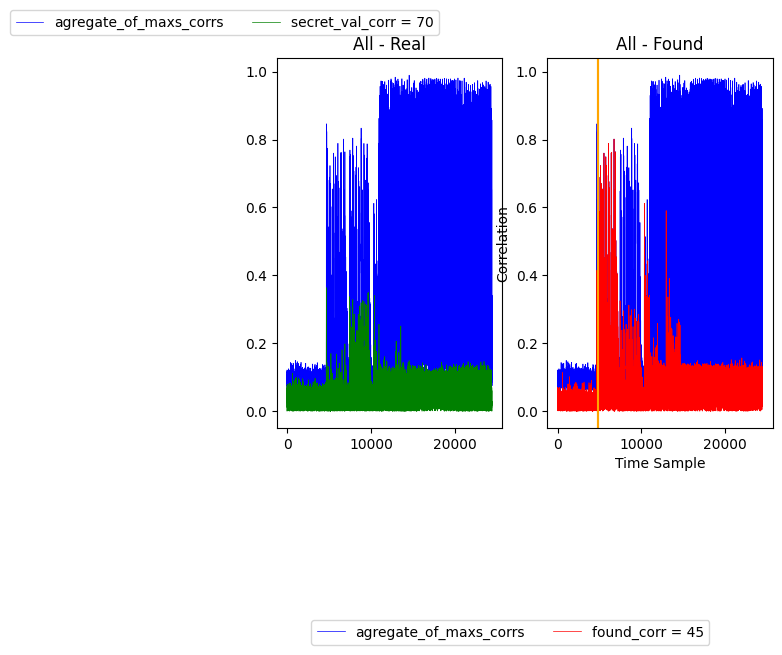

Hello 4
In range 4764 - 24429
 Found the soonest secret value is 45, at the time sample 4790, with correlation secret_corr = 0.701


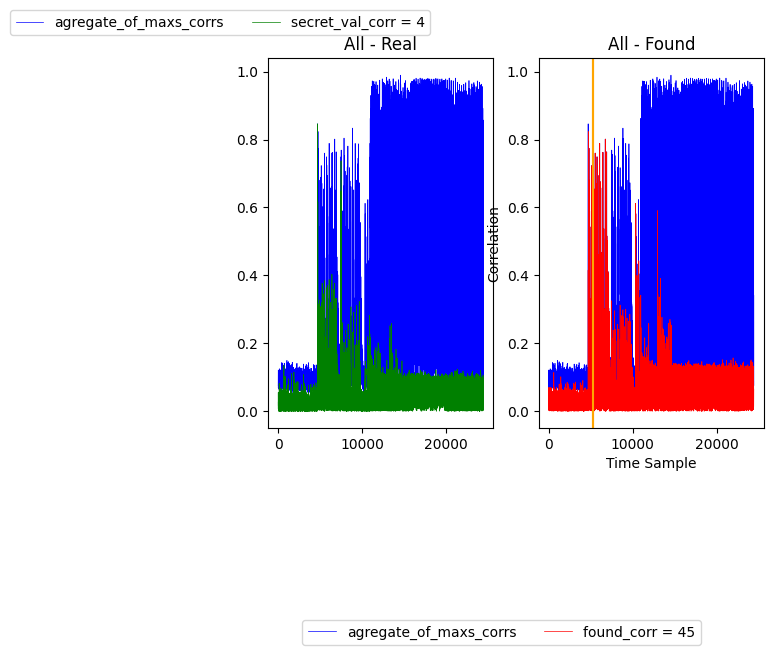

Hello 120
In range 5289 - 24429
 Found the soonest secret value is 45, at the time sample 5787, with correlation secret_corr = 0.704


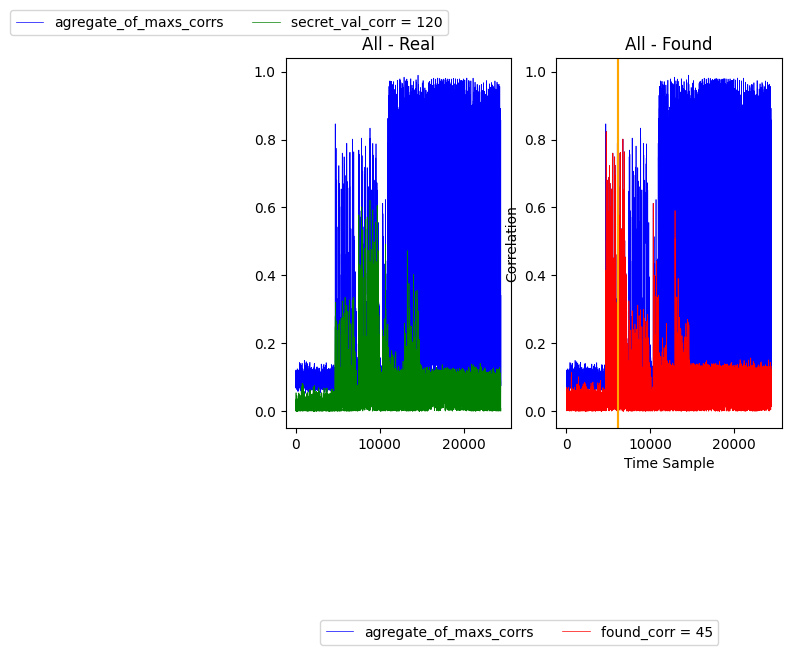

Hello 104
In range 6092 - 24429
 Found the soonest secret value is 45, at the time sample 6397, with correlation secret_corr = 0.703


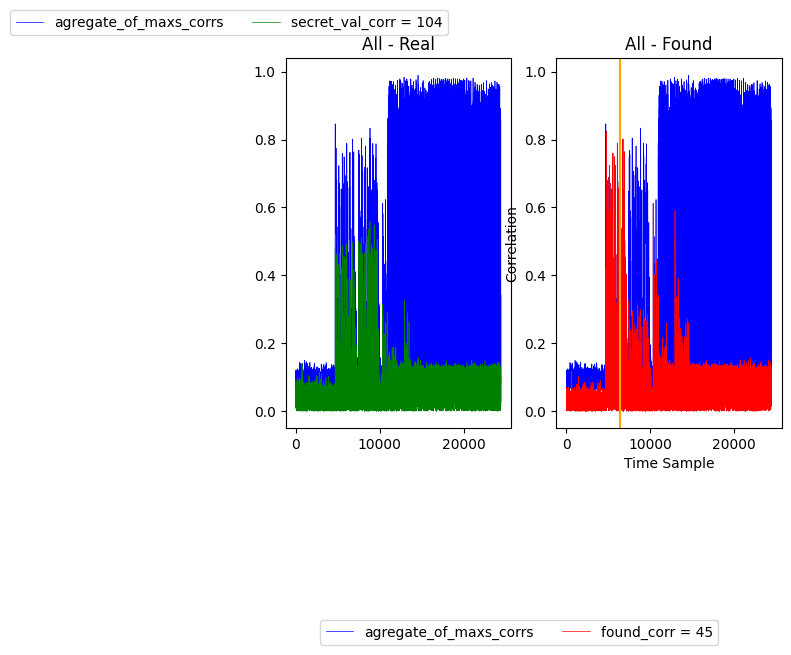

Hello 255
In range 6424 - 24429
 Found the soonest secret value is 45, at the time sample 6450, with correlation secret_corr = 0.695


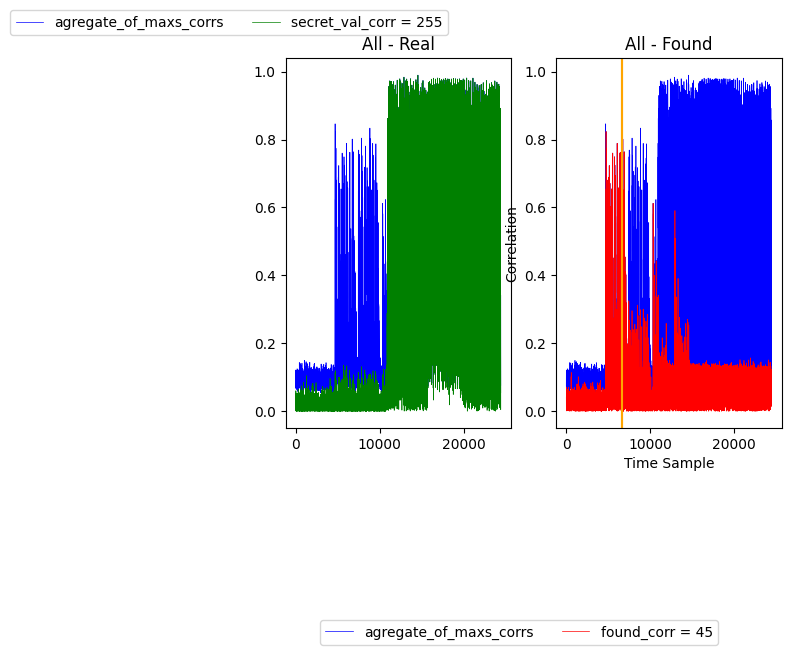

Hello 43
In range 6590 - 24429
 Found the soonest secret value is 45, at the time sample 6730, with correlation secret_corr = 0.801


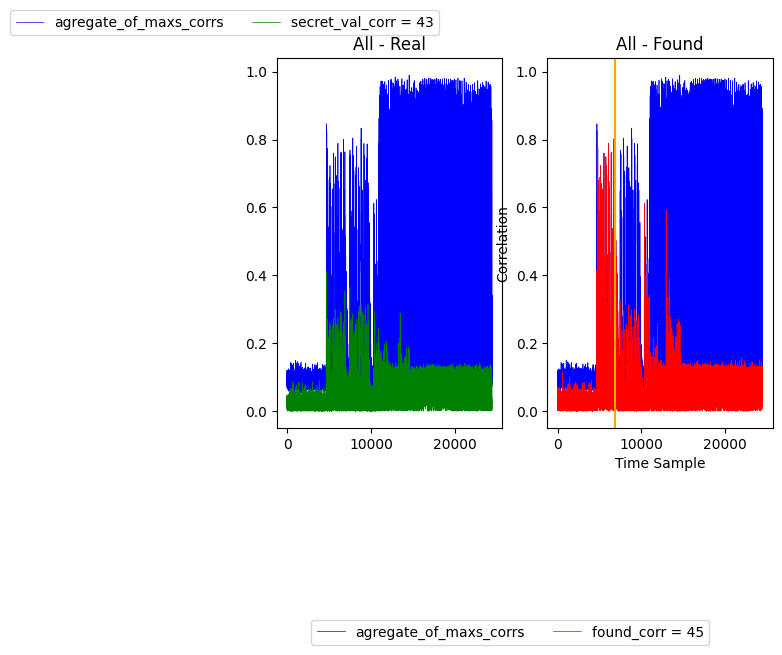

Hello 0
In range 6815 - 24429
 Found the soonest secret value is 45, at the time sample 6899, with correlation secret_corr = 0.692


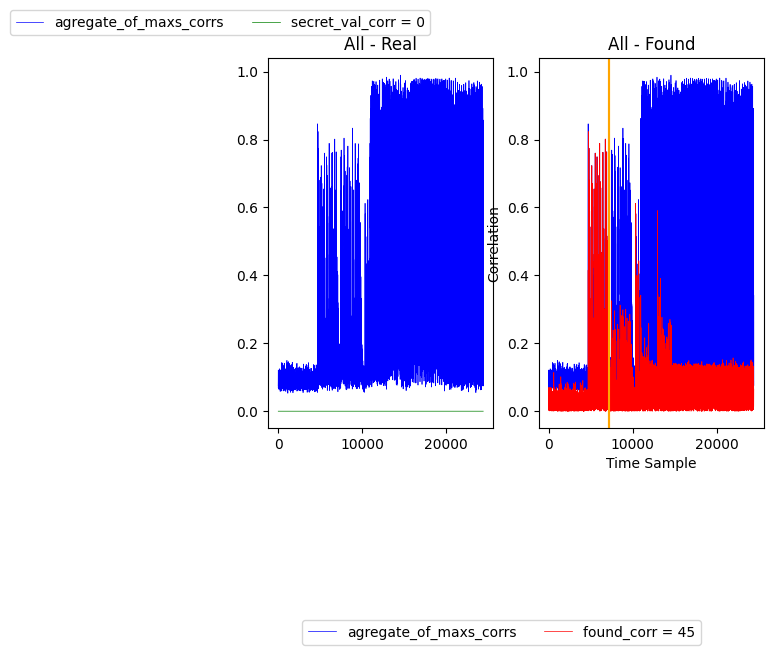

Hello 207
In range 7200 - 24429
 Found the soonest secret value is 207, at the time sample 7502, with correlation secret_corr = 0.728


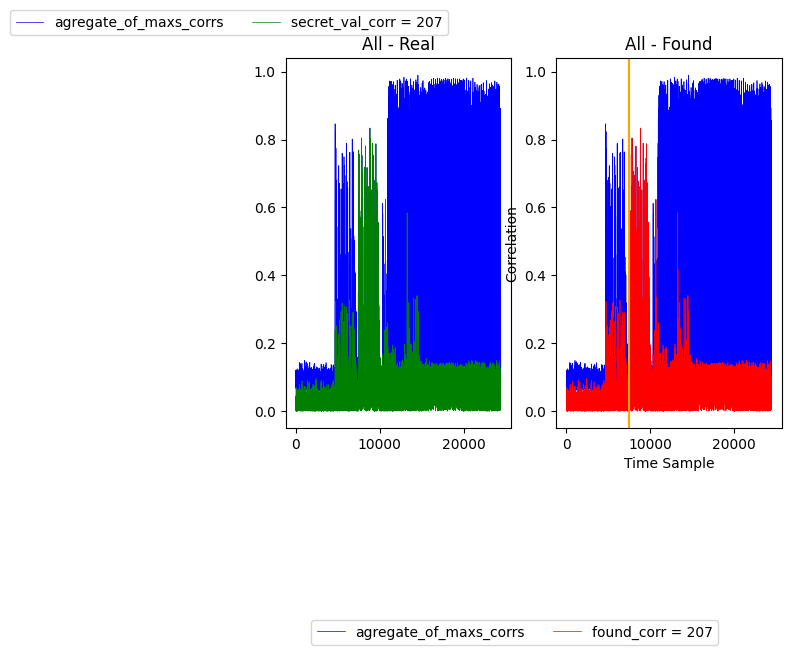

Hello 41
In range 7530 - 24429
 Found the soonest secret value is 207, at the time sample 7558, with correlation secret_corr = 0.694


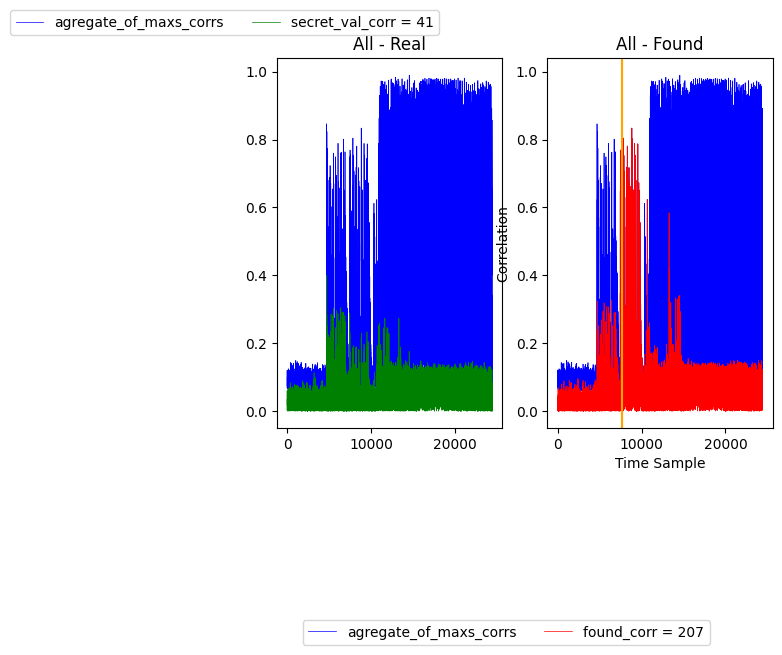

Hello 180
In range 7698 - 24429
 Found the soonest secret value is 207, at the time sample 7838, with correlation secret_corr = 0.804


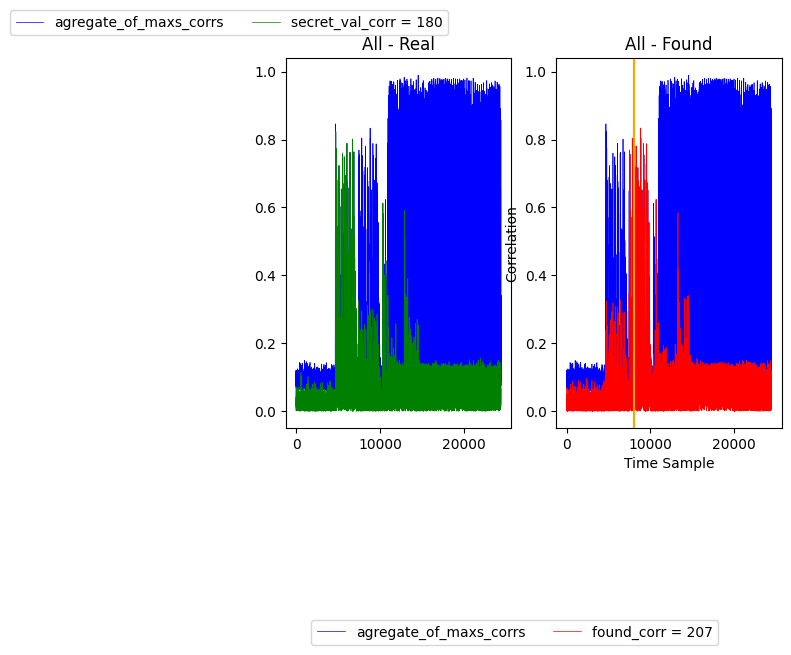

Hello 216
In range 8031 - 24429
 Found the soonest secret value is 207, at the time sample 8223, with correlation secret_corr = 0.717


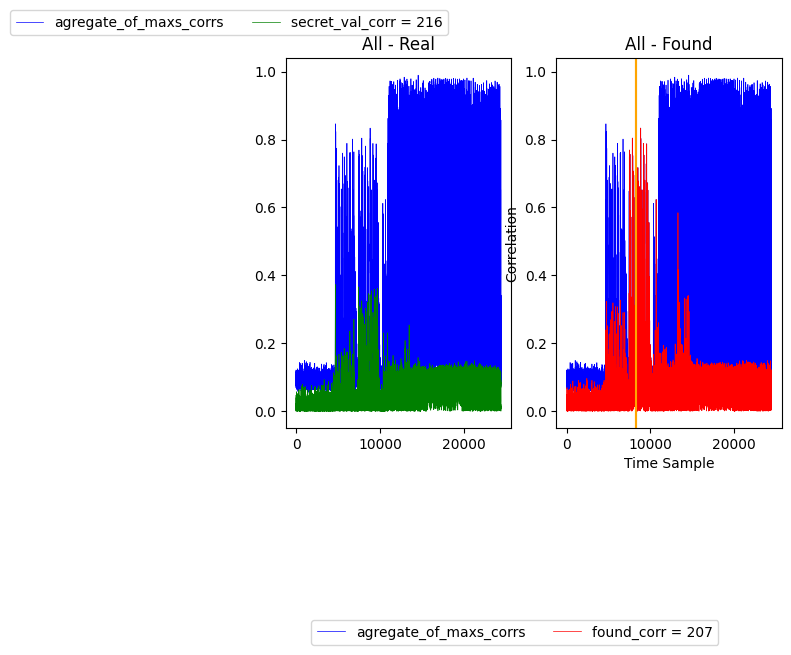

In [12]:
corr_map = abs(np.array(corr_HW32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW32_{firmwareName}')

##### CPA, weight extraction - HW8

Hello 45
Peak range: 0.3
24429
 Index of global max: 10678 and global_max_val: 0.8473367197620125


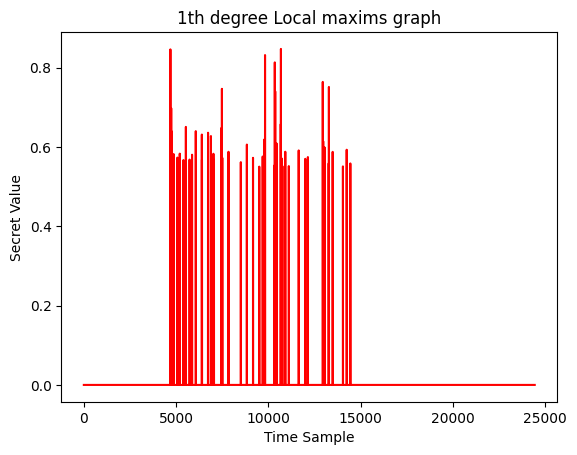

Number of uniques: 19
Number of local maxims: 105
Uniquess: [1, 255, 180, 90, 160, 45, 120, 60, 158, 207, 240, 211, 19, 49, 135, 121, 37, 112, 111]
Local maxims: [1, 1, 1, 1, 1, 1, 255, 180, 180, 180, 180, 90, 90, 90, 90, 90, 180, 180, 180, 90, 90, 180, 180, 180, 180, 90, 180, 180, 90, 90, 160, 45, 45, 45, 1, 1, 1, 1, 1, 1, 255, 255, 255, 120, 60, 158, 158, 158, 60, 158, 158, 207, 60, 240, 207, 207, 207, 207, 207, 207, 45, 45, 45, 45, 45, 211, 211, 211, 19, 19, 49, 207, 207, 207, 207, 207, 207, 45, 135, 121, 121, 121, 121, 121, 45, 45, 45, 45, 45, 45, 37, 37, 37, 37, 37, 207, 207, 207, 207, 207, 112, 112, 120, 111, 111]


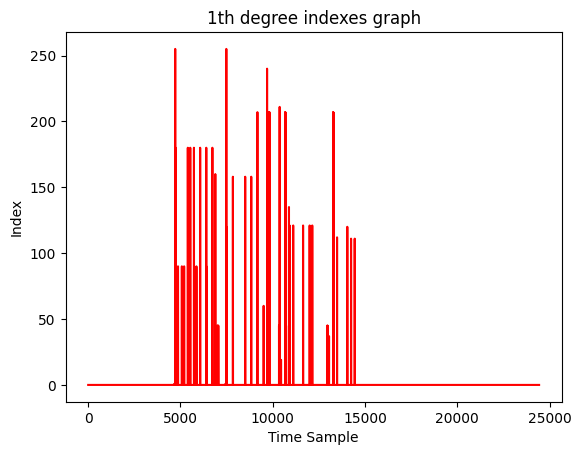

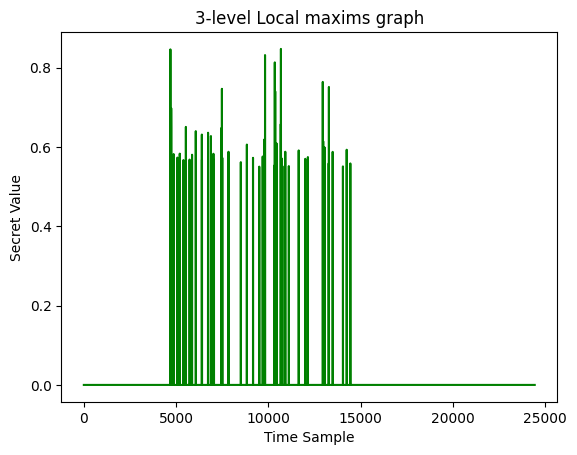

Number of uniques: 19
Number of local maxims: 121
Uniquess: [1, 255, 180, 90, 160, 45, 120, 60, 158, 207, 240, 211, 19, 49, 135, 121, 37, 112, 111]
Local maxims: [1, 1, 1, 1, 1, 1, 1, 1, 1, 255, 180, 180, 180, 180, 180, 90, 90, 90, 90, 90, 90, 180, 180, 180, 90, 180, 180, 90, 180, 180, 180, 180, 180, 90, 180, 180, 90, 90, 90, 160, 45, 45, 45, 1, 1, 1, 1, 1, 1, 255, 255, 255, 120, 60, 158, 158, 158, 158, 60, 158, 158, 207, 60, 240, 240, 207, 207, 207, 207, 207, 207, 207, 45, 45, 45, 45, 45, 45, 211, 211, 211, 19, 19, 19, 49, 207, 207, 207, 207, 207, 207, 207, 207, 45, 135, 121, 121, 121, 121, 121, 45, 45, 45, 45, 45, 45, 37, 37, 37, 37, 37, 207, 207, 207, 207, 207, 112, 112, 120, 111, 111]


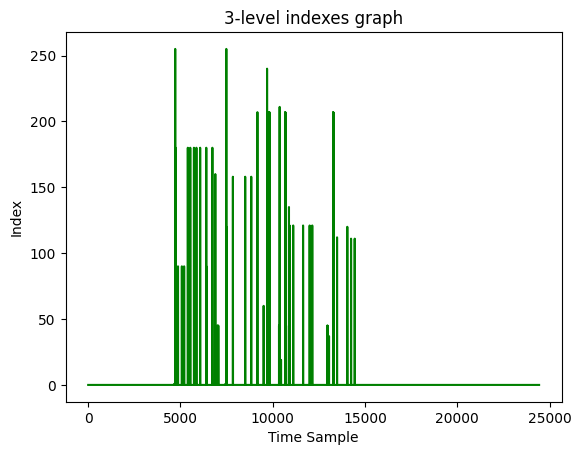

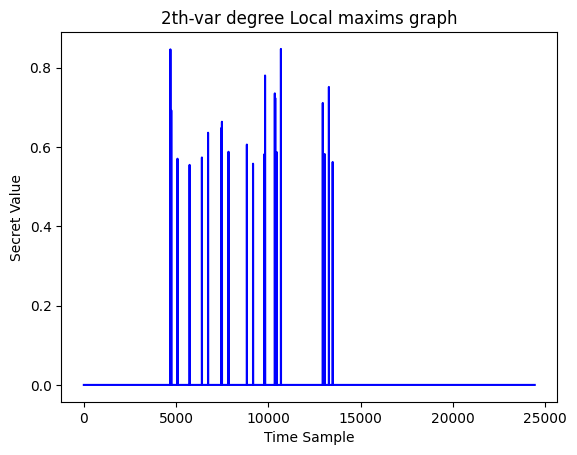

Number of uniques: 11
Number of local maxims: 24
Uniquess: [1, 255, 180, 90, 158, 207, 45, 211, 19, 37, 112]
Local maxims: [1, 255, 180, 90, 90, 180, 90, 1, 255, 158, 158, 207, 207, 207, 45, 211, 19, 207, 45, 45, 37, 37, 207, 112]


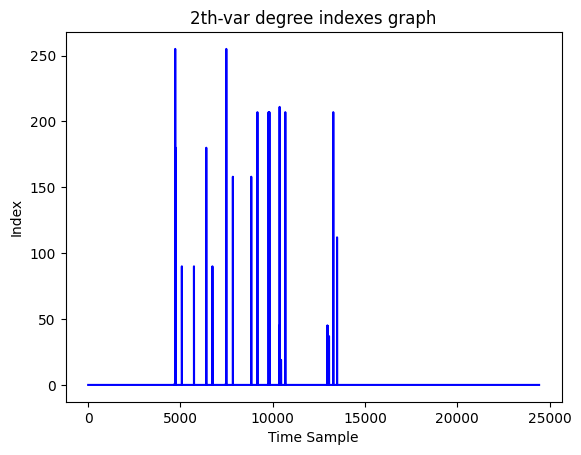

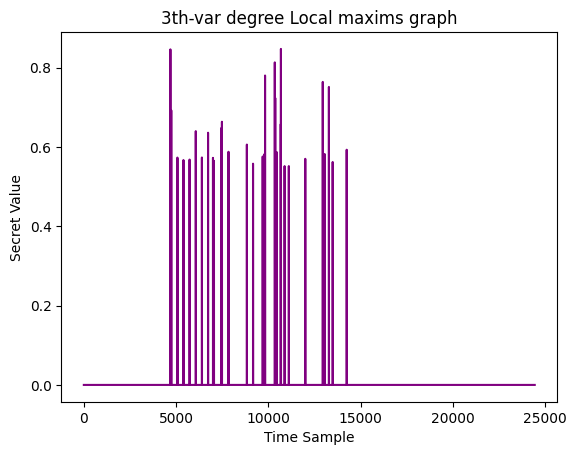

Number of uniques: 15
Number of local maxims: 61
Uniquess: [1, 180, 90, 45, 255, 158, 207, 240, 211, 19, 135, 121, 37, 112, 111]
Local maxims: [1, 1, 1, 1, 180, 180, 90, 90, 90, 180, 180, 90, 180, 180, 90, 90, 90, 45, 45, 1, 1, 1, 1, 255, 255, 158, 158, 158, 207, 240, 207, 207, 207, 207, 45, 45, 45, 211, 211, 211, 19, 207, 207, 207, 207, 135, 121, 121, 45, 45, 45, 45, 45, 37, 37, 37, 207, 207, 207, 112, 111]


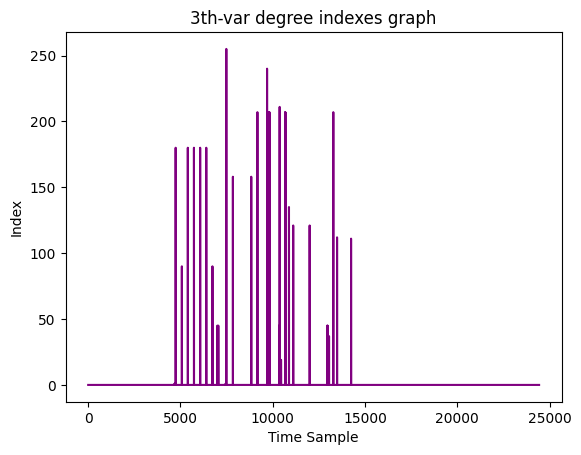

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4690, with correlation secret_corr = 0.846


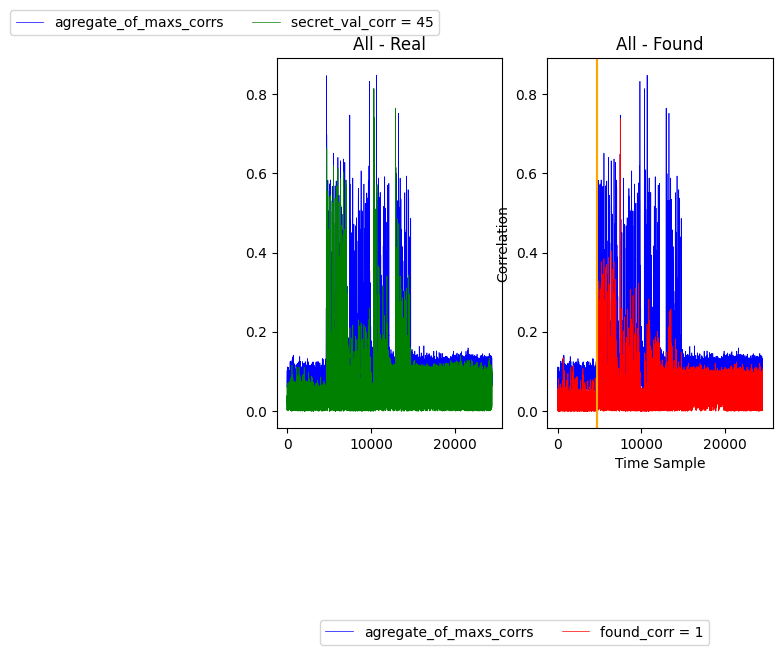

Hello 70
In range 4702 - 24429
 Found the soonest secret value is 255, at the time sample 4714, with correlation secret_corr = 0.568


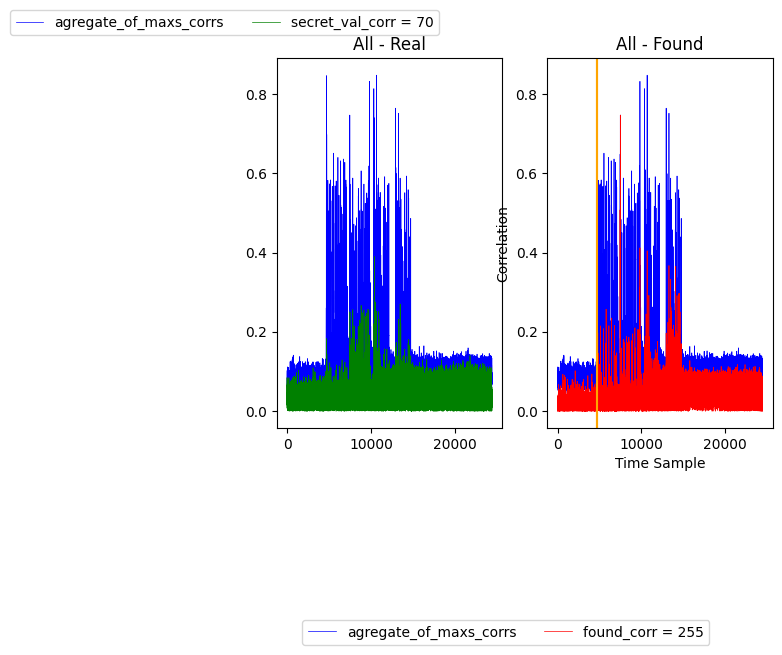

Hello 4
In range 4725 - 24429
 Found the soonest secret value is 180, at the time sample 4737, with correlation secret_corr = 0.692


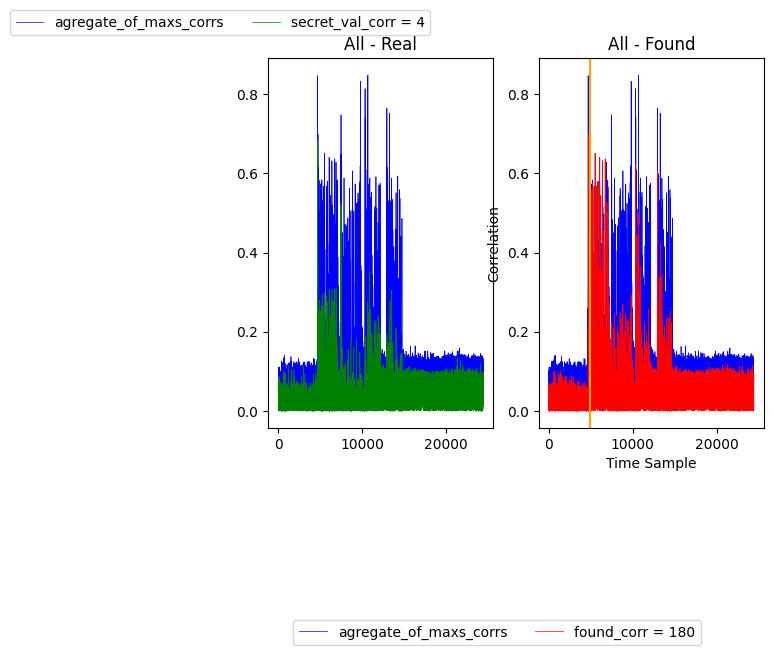

Hello 120
In range 4906 - 24429
 Found the soonest secret value is 90, at the time sample 5074, with correlation secret_corr = 0.570


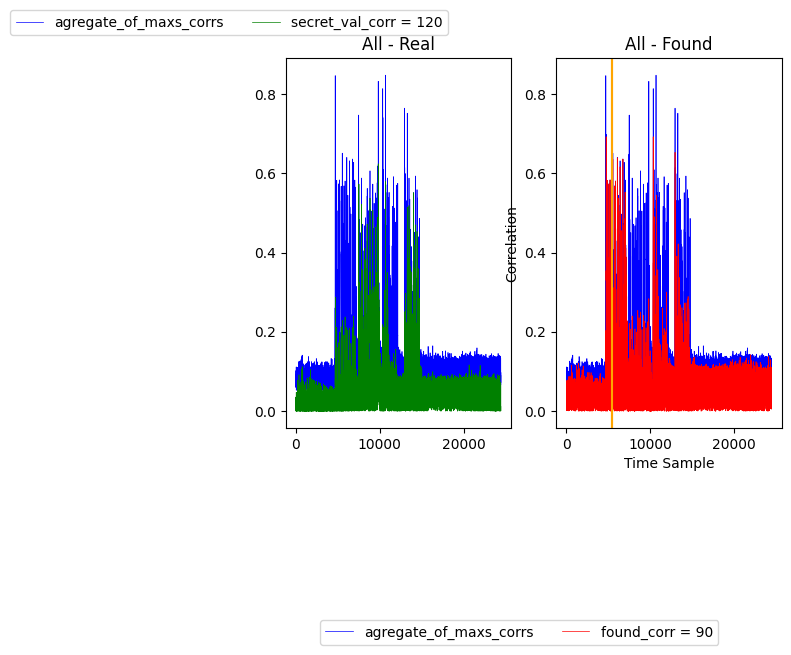

Hello 104
In range 5402 - 24429
 Found the soonest secret value is 90, at the time sample 5730, with correlation secret_corr = 0.555


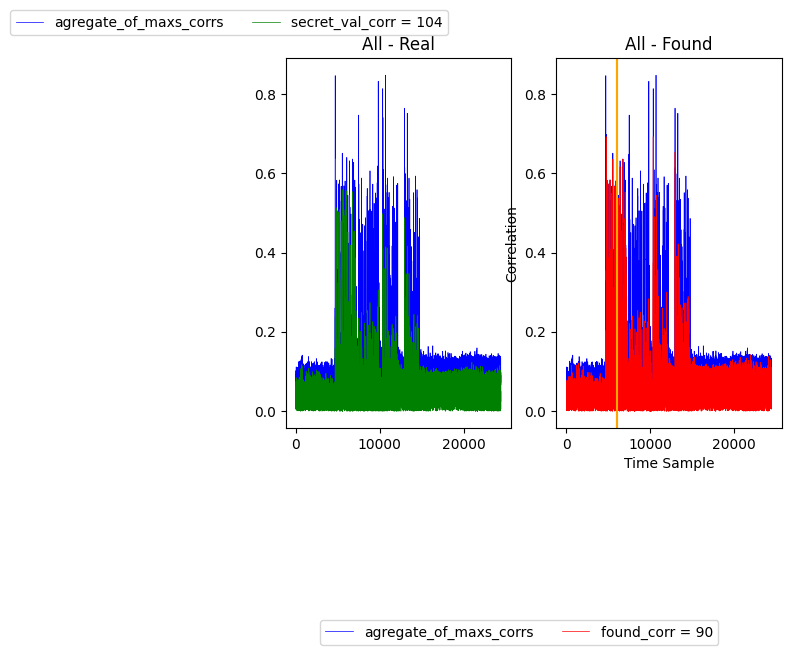

Hello 255
In range 6063 - 24429
 Found the soonest secret value is 180, at the time sample 6397, with correlation secret_corr = 0.574


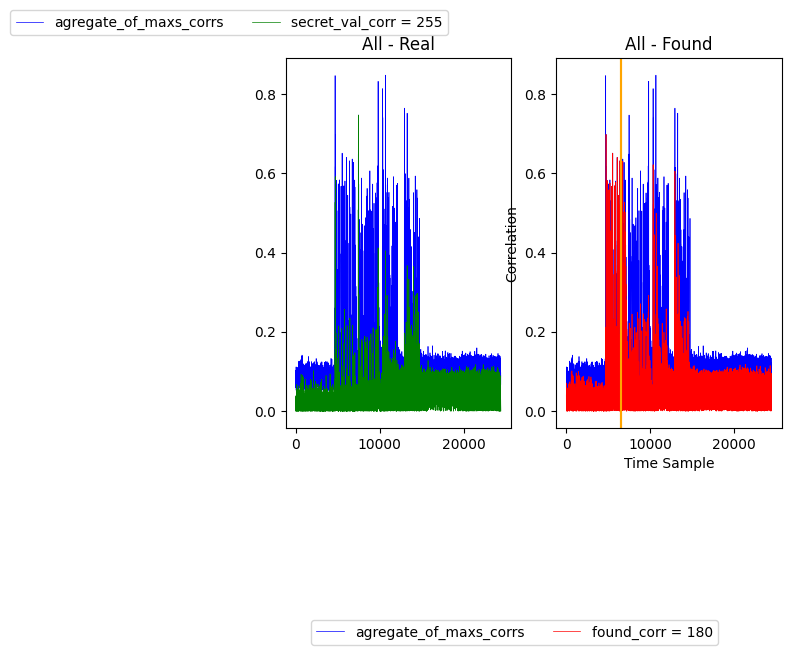

Hello 43
In range 6564 - 24429
 Found the soonest secret value is 90, at the time sample 6730, with correlation secret_corr = 0.636


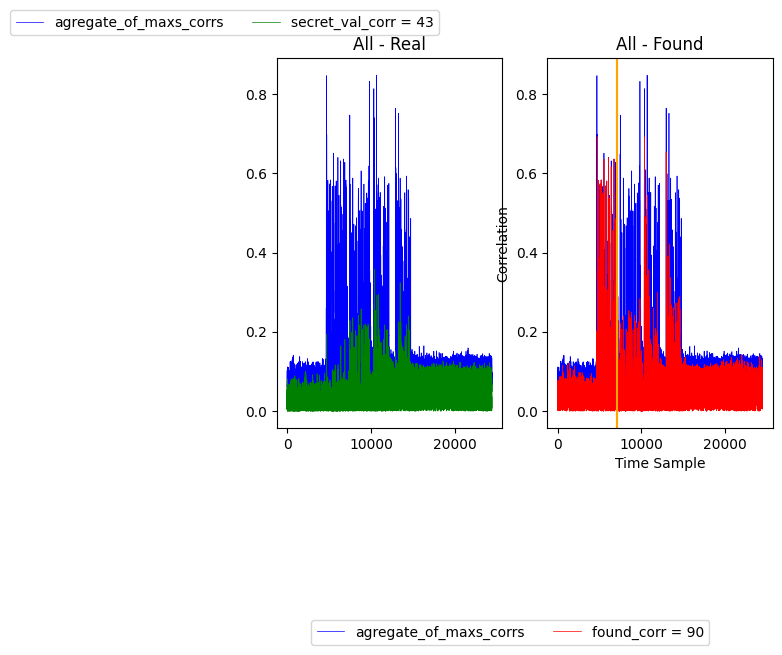

Hello 0
In range 7093 - 24429
 Found the soonest secret value is 1, at the time sample 7457, with correlation secret_corr = 0.648


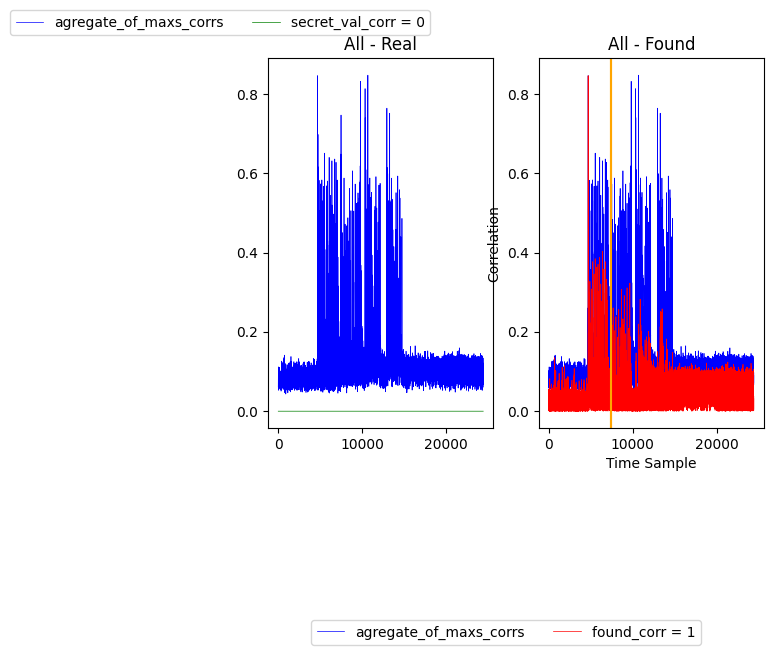

Hello 207
In range 7470 - 24429
 Found the soonest secret value is 255, at the time sample 7482, with correlation secret_corr = 0.664


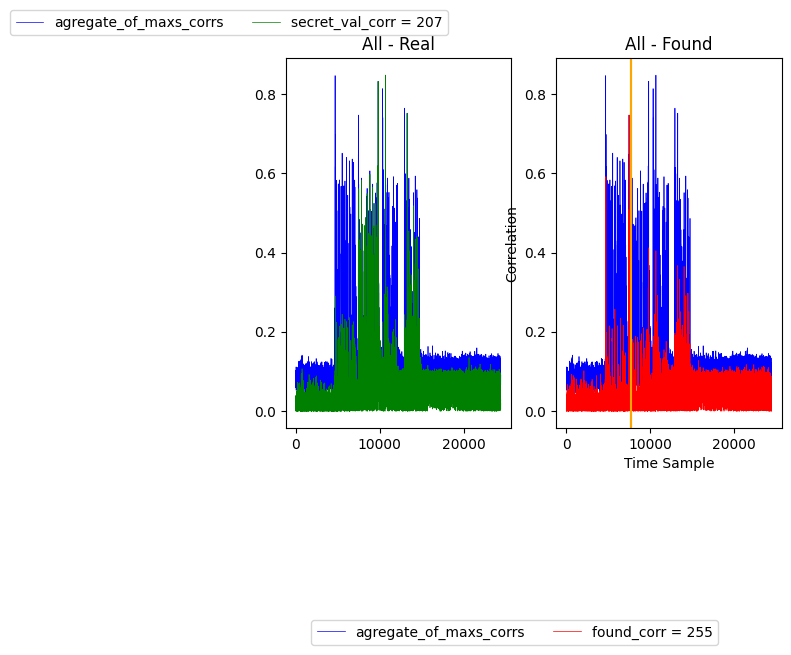

Hello 41
In range 7660 - 24429
 Found the soonest secret value is 158, at the time sample 7838, with correlation secret_corr = 0.588


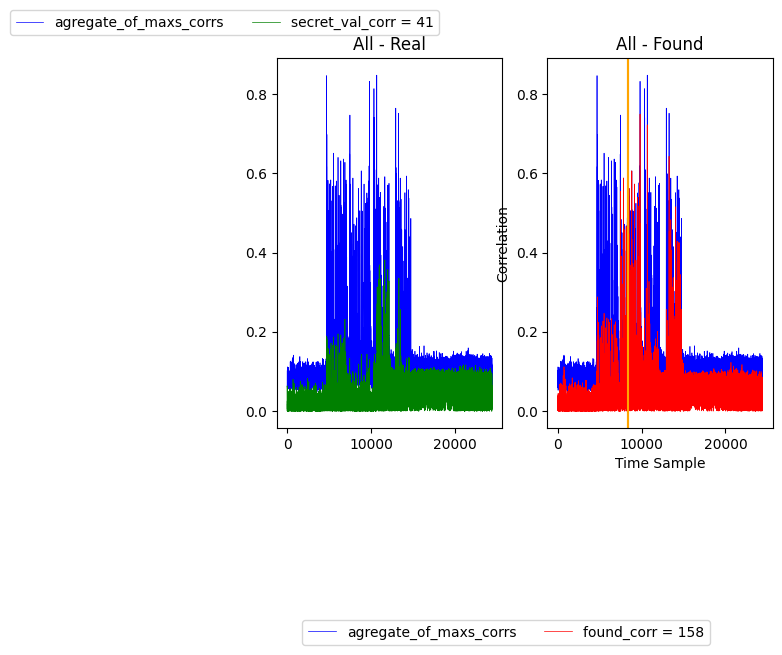

Hello 180
In range 8335 - 24429
 Found the soonest secret value is 158, at the time sample 8833, with correlation secret_corr = 0.606


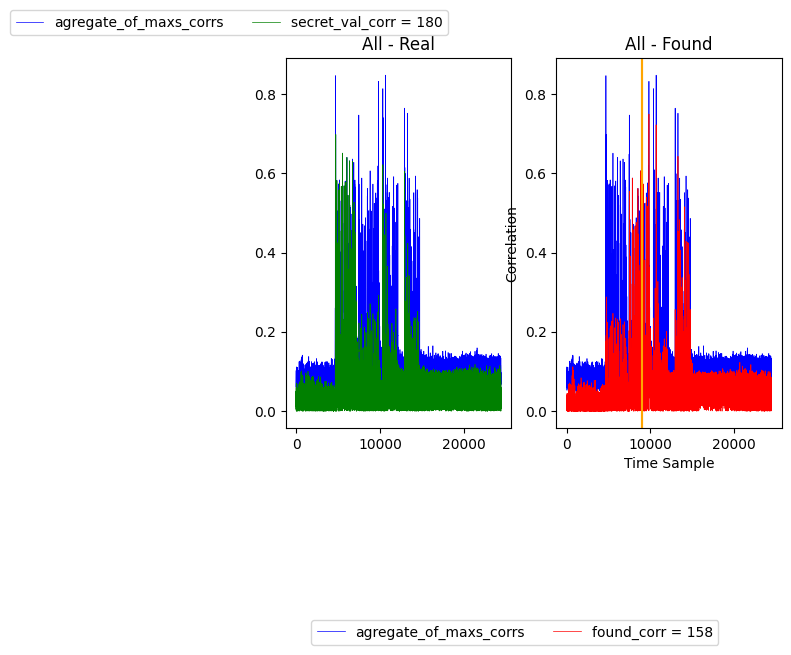

Hello 216
In range 9000 - 24429
 Found the soonest secret value is 207, at the time sample 9167, with correlation secret_corr = 0.558


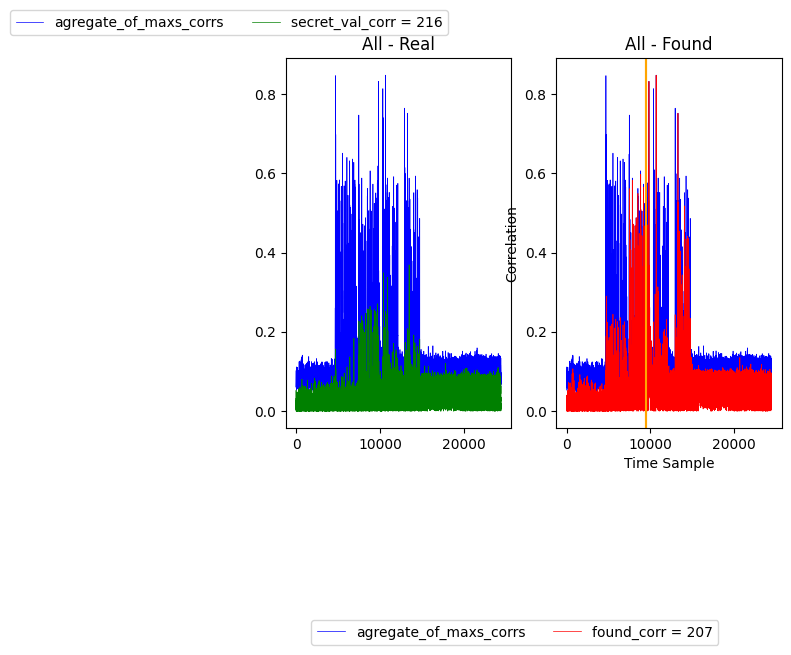

In [13]:
corr_map = abs(np.array(corr_HW8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW8_{firmwareName}')

### Current Overview and findings: 